C:\Users\himav\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\himav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Processing Pages: 100%|█████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 290.64it/s]


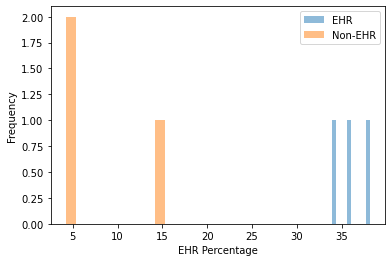

Suggested threshold: 24.58%


Processing Pages: 100%|█████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 128.18it/s]


The file C:/mini project/dataset/ehr2.pdf is classified as: EHR


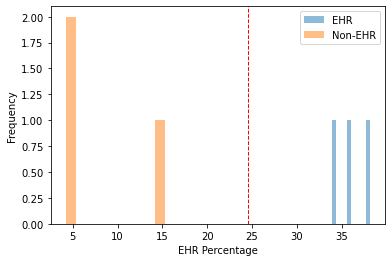

Processing Pages: 100%|█████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 214.21it/s]

Report for C:/mini project/dataset/ehr4.pdf:
EHR Content Percentage: 35.96%
Word Counts:
  headings: 11
  bold: 16
  italic: 0
  italian: 0
  normal: 87
Filtered Word Counts:
  headings: 5
  bold: 3
  italic: 0
  italian: 0
  normal: 4



In [1]:
import os
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import fitz  # PyMuPDF
from tqdm import tqdm
import matplotlib.pyplot as plt

# Download NLTK resources if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Define the list of medical terms
medical_terms = [
    "abdomen", "allergy", "antibody", "apnea", "blood pressure", "bmi", "calcium",
    "cholesterol", "chronic", "cough", "diagnosis", "disability", "ecg", "eeg", "emergency department",
    "family history", "fever", "glucose", "hpi", "immunization", "infection", "injury", "laboratory",
    "medication", "nausea", "neurology", "pain", "pathology", "physical exam", "prescription", "radiology",
    "respiratory rate", "screening", "surgery", "symptom", "temperature", "treatment", "ultrasound",
    "vaccination", "vital signs", "x-ray", "cardiovascular", "dermatology", "endocrinology",
    "gastroenterology", "hematology", "nephrology", "neurology", "oncology", "ophthalmology", "orthopedics",
    "otolaryngology", "pediatrics", "psychiatry", "pulmonary", "reproductive health", "urology", "biopsy",
    "blood test", "catheterization", "colonoscopy", "ct scan", "dialysis", "endoscopy", "intravenous",
    "lumbar puncture", "mammography", "mri", "antibiotic", "antidepressant", "antihistamine", "aspirin",
    "insulin", "steroid", "codeine", "family practice", "hospice", "hospice care", "nurse practitioner",
    "occupational therapy", "physical therapy", "prognosis", "rehabilitation", "specialist", "urgent care",
    "doctor-patient relationship", "patient", "mental capacity", "clinical history", "stroke", "cardiac failure",
    "chronic renal disease", "hypertension", "hyperlipidemia", "cardiomyopathy", "rehabilitation",
    "behavioural symptoms", "psychological symptoms", "dementia", "physical examination",
    "mental state examination", "ct brain scan", "mri brain scan", "medicine", "routine check-up",
    "management of chronic conditions", "diagnosis", "type 2 diabetes mellitus", "blood pressure",
    "blood tests", "hba1c", "lipid profile", "lifestyle changes", "diet", "exercise", "smoking cessation",
    "contact information", "address", "phone", "email", "emergency contact", "medical history",
    "allergies", "past medical history", "surgeries", "family history", "medications", "immunizations",
    "vital signs", "progress notes", "provider", "notes", "radiology reports", "chest x-ray",
    "Rheumatoid Arthritis", "Hypothyroidism", "Asthma", "Diagnosis", "Rheumatoid", "Arthritis", "Diagnoses",
    "Hypothyroidism", "diagnosed", "Asthma", "Allergies", "reported", "thyroid", "Conditions", "Methotrexate",
    "Hydroxychloroquine", "Hypothyroidism", "Albuterol", "inhaler", "Monitor", "lab", "tests", "Levothyroxine",
    "diet", "symptoms", "health", "Diagnosis", "Rheumatoid", "Arthritis", "Diagnoses", "Hypothyroidism",
    "diagnosed", "Asthma", "Allergies", "reported", "thyroid", "Conditions", "Methotrexate",
    "Hydroxychloroquine", "Hypothyroidism", "Albuterol", "inhaler", "Monitor", "lab", "tests", "Levothyroxine",
    "diet", "symptoms", "health", "rheumatology", "appointment", "blood", "count", "metabolic", "pain",
    "therapy", "patient", "medication", "regimen", "Allergies", "Methotrexate", "Hydroxychloroquine",
    "Levothyroxine", "Type 2 Diabetes Mellitus", "Diabetes", "Hypertension", "Metformin", "Lisinopril",
    "Allergies", "Blood", "glucose", "levels", "Blood pressure", "HbA1c (Glycated hemoglobin)", "Lipid panel",
    "Endocrinology", "Medications", "Routine follow-up", "Diagnosis", "Treatment", "plan", "Lab", "tests",
    "Patient", "Hospital", "Medical history", "Management", "Healthcare", "Examination", "Complications",
    "Lifestyle", "Diet", "Exercise", "Smoking cessation", "Fatigue", "Symptoms", "Visit", "Appointment",
    "Albuterol inhaler", "CRP (C-reactive protein)", "ESR (Erythrocyte sedimentation rate)",
    "TSH (Thyroid-stimulating hormone)", "T4 (Thyroxine)", "Asthma exacerbation", "Coronary artery disease (CAD)",
    "Coronary artery bypass grafting (CABG)", "Lisinopril", "Metformin", "Atorvastatin", "Furosemide",
    "HbA1c (Glycated hemoglobin)", "Glucose", "Cardiovascular", "Nephropathy", "Diabetic", "Surgery", "Bypass",
    "Artery", "mg (milligram)", "Diagnosis", "Blood", "Therapy", "Exercises", "Medications", "Joint pain",
    "Stiffness", "Wheezing", "Inhaler", "Hypertension", "Type 2 Diabetes Mellitus", "Hyperlipidemia",
    "Blood pressure", "Pulse", "Routine check-up", "Management", "Follow-up", "Lifestyle changes", "Diet",
    "Smoking cessation", "Prescription", "Side effects"
]

def extract_from_pdf(file_path):
    doc = fitz.open(file_path)
    text_dict = {"headings": [], "bold": [], "italic": [], "italian": [], "normal": []}
    
    for page in tqdm(doc, desc="Processing Pages"):
        blocks = page.get_text("dict")["blocks"]
        for block in blocks:
            if "lines" in block:
                for line in block["lines"]:
                    for span in line["spans"]:
                        text = span["text"]
                        font_size = span["size"]
                        font_flags = span["flags"]
                        font = span["font"]
                        weight = span.get("weight", 400)

                        if font_size > 14:
                            text_dict["headings"].extend(text.split())
                        elif "bold" in font.lower() or font_flags & 2 or weight > 500:
                            text_dict["bold"].extend(text.split())
                        elif "italic" in font.lower() or font_flags & 1:
                            text_dict["italic"].extend(text.split())
                        elif "italian" in font.lower() or "italico" in font.lower():
                            text_dict["italian"].extend(text.split())
                        else:
                            text_dict["normal"].extend(text.split())
    
    return text_dict

def extract_text(file_path):
    _, file_extension = os.path.splitext(file_path)
    file_extension = file_extension.lower()
    
    if file_extension == ".pdf":
        return extract_from_pdf(file_path)
    else:
        raise ValueError("Unsupported file type. Please use a file with extension 'pdf'.")

def clean_and_lemmatize(text_dict):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    punctuations = string.punctuation + ""  # Add specific symbols to remove
    
    cleaned_dict = {}
    for key, values in text_dict.items():
        cleaned_values = [
            lemmatizer.lemmatize(value.lower().strip(punctuations))
            for value in values if value and value.lower().strip(punctuations) not in stop_words
        ]
        cleaned_dict[key] = cleaned_values
    
    return cleaned_dict

def print_text_dict(text_dict):
    for key, values in text_dict.items():
        print(f"{key}:", values)

def count_words(text_dict):
    return {key: len(values) for key, values in text_dict.items()}

def total_counts(word_counts):
    return sum(word_counts.values())

def filter_medical_terms(text_dict, medical_terms):
    medical_terms_set = set(medical_terms)
    return {key: [value for value in values if value in medical_terms_set] for key, values in text_dict.items()}

def print_filtered_counts(filtered_dict):
    filtered_word_counts = {key: len(values) for key, values in filtered_dict.items()}
    for key, count in filtered_word_counts.items():
        print(f"{key}: {count}")

def calculate_percentage(cleaned_dict, filtered_dict, weights):
    total_words = sum(len(values) for values in cleaned_dict.values())
    weighted_count = sum(len(filtered_dict[key]) * weights[key] for key in filtered_dict.keys())
    percentage = (weighted_count / total_words) * 100
    return percentage

def calculate_ehr_percentage(file_path, medical_terms, weights):
    text_dict = extract_text(file_path)
    cleaned_dict = clean_and_lemmatize(text_dict)
    filtered_dict = filter_medical_terms(cleaned_dict, medical_terms)
    return calculate_percentage(cleaned_dict, filtered_dict, weights)

def generate_report(file_path, percentage, word_counts, filtered_word_counts):
    report = f"Report for {file_path}:\n"
    report += f"EHR Content Percentage: {percentage:.2f}%\n"
    report += "Word Counts:\n"
    for key, count in word_counts.items():
        report += f"  {key}: {count}\n"
    report += "Filtered Word Counts:\n"
    for key, count in filtered_word_counts.items():
        report += f"  {key}: {count}\n"
    return report

def visualize_threshold(ehr_percentages, non_ehr_percentages, threshold):
    plt.hist(ehr_percentages, bins=10, alpha=0.5, label='EHR')
    plt.hist(non_ehr_percentages, bins=10, alpha=0.5, label='Non-EHR')
    plt.axvline(threshold, color='red', linestyle='dashed', linewidth=1)
    plt.xlabel('EHR Percentage')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()

def classify_pdf(file_path, threshold, medical_terms, weights):
    percentage = calculate_ehr_percentage(file_path, medical_terms, weights)
    return "EHR" if percentage >= threshold else "Non-EHR"

# Sample paths (you should replace these with actual file paths)
ehr_files = ["C:/mini project/dataset/ehr4.pdf", "C:/mini project/dataset/ehr5.pdf", "C:/mini project/dataset/ehr3.pdf"]
non_ehr_files = ["C:/mini project/dataset/non_ehr1.pdf", "C:/mini project/dataset/non_ehr2.pdf", "C:/mini project/dataset/non_ehr3.pdf"]

# Define weights for each category
weights = {
    "headings": 5,  # Assign higher weight to headings
    "bold": 4,      # Assign slightly lower weight to bold
    "italic": 3,    # Assign slightly lower weight to italic
    "italian": 3,   # Assign slightly lower weight to italian
    "normal": 1     # Assign the lowest weight to normal
}

# Calculate percentages for EHR and non-EHR files
ehr_percentages = [calculate_ehr_percentage(file, medical_terms, weights) for file in ehr_files]
non_ehr_percentages = [calculate_ehr_percentage(file, medical_terms, weights) for file in non_ehr_files]

# Plot the distributions
plt.hist(ehr_percentages, bins=10, alpha=0.5, label='EHR')
plt.hist(non_ehr_percentages, bins=10, alpha=0.5, label='Non-EHR')
plt.xlabel('EHR Percentage')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

# Analyze the distributions and decide on a threshold
threshold = (min(ehr_percentages) + max(non_ehr_percentages)) / 2
print(f"Suggested threshold: {threshold:.2f}%")

# Example classification
new_file_path = "C:/mini project/dataset/ehr2.pdf"
classification = classify_pdf(new_file_path, threshold, medical_terms, weights)
print(f"The file {new_file_path} is classified as: {classification}")

# Visualize the threshold
visualize_threshold(ehr_percentages, non_ehr_percentages, threshold)

# Generate and print a report for a sample EHR file
file_path = ehr_files[0]
percentage = calculate_ehr_percentage(file_path, medical_terms, weights)
text_dict = extract_text(file_path)
cleaned_dict = clean_and_lemmatize(text_dict)
word_counts = count_words(cleaned_dict)
filtered_dict = filter_medical_terms(cleaned_dict, medical_terms)
filtered_word_counts = {key: len(values) for key, values in filtered_dict.items()}
report = generate_report(file_path, percentage, word_counts, filtered_word_counts)
print(report)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\himav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


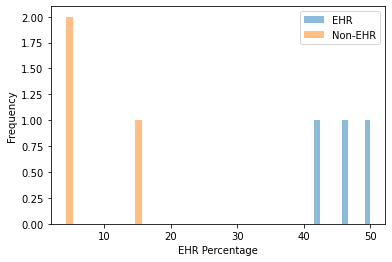

Suggested threshold: 28.69%
The file C:/mini project/dataset/ehr1.pdf is classified as: EHR


In [2]:
import os
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import fitz  # PyMuPDF
import matplotlib.pyplot as plt

# Download NLTK resources if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')

def extract_from_pdf(file_path):
    doc = fitz.open(file_path)
    text_dict = {"headings": [], "bold": [], "italic": [], "italian": [], "normal": []}
    
    for page in doc:
        blocks = page.get_text("dict")["blocks"]
        for block in blocks:
            if "lines" in block:
                for line in block["lines"]:
                    for span in line["spans"]:
                        text = span["text"]
                        font_flags = span["flags"]
                        font_size = span["size"]
                        font = span["font"]
                        weight = span.get("weight", 400)
                        
                        # Assuming headings are text spans with a larger font size (e.g., > 14)
                        if font_size > 14:
                            text_dict["headings"].extend(text.split())
                        elif "bold" in font.lower() or font_flags & 2 or weight > 500:  # Check if the font name contains "bold", if bold flag is set, or if weight is high
                            text_dict["bold"].extend(text.split())
                        elif "italic" in font.lower() or font_flags & 1:  # Check if the font name contains "italic" or if italic flag is set
                            text_dict["italic"].extend(text.split())
                        elif "italian" in font.lower() or "italico" in font.lower():  # Check if the font name contains "italian" or "italico"
                            text_dict["italian"].extend(text.split())
                        else:
                            text_dict["normal"].extend(text.split())
                    
    return text_dict

def extract_text(file_path):
    _, file_extension = os.path.splitext(file_path)
    file_extension = file_extension.lower()
    
    if file_extension == ".pdf":
        return extract_from_pdf(file_path)
    else:
        raise ValueError("Unsupported file type. Please use a file with extension 'pdf'.")

def clean_and_lemmatize(text_dict):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    punctuations = string.punctuation + ""  # Add any other specific symbols to remove
    
    cleaned_dict = {}
    for key, values in text_dict.items():
        cleaned_values = []
        for value in values:
            value = value.lower().strip(punctuations)
            if value and value not in stop_words:
                lemmatized_value = lemmatizer.lemmatize(value)
                cleaned_values.append(lemmatized_value)
        cleaned_dict[key] = cleaned_values
    
    return cleaned_dict

def count_words(text_dict):
    word_counts = {key: len(values) for key, values in text_dict.items()}
    return word_counts

def total_counts(word_counts):
    total_count = sum(word_counts.values())
    return total_count

def filter_medical_terms(text_dict, medical_terms):
    filtered_dict = {}
    medical_terms_set = set(medical_terms)  # Convert to set for faster lookup
    
    for key, values in text_dict.items():
        filtered_values = [value for value in values if value in medical_terms_set]
        filtered_dict[key] = filtered_values
    
    return filtered_dict

def calculate_percentage(cleaned_dict, filtered_dict, weights):
    # Calculate the total number of words from the cleaned dictionary
    total_words = sum(len(values) for values in cleaned_dict.values())
    
    # Calculate the weighted count from the filtered dictionary
    weighted_count = sum(len(filtered_dict[key]) * weights[key] for key in filtered_dict.keys())
    
    # Calculate the percentage
    percentage = (weighted_count / total_words) * 100
    return percentage

# Define a function to calculate the percentage for a given PDF
def calculate_ehr_percentage(file_path, medical_terms, weights):
    text_dict = extract_text(file_path)
    cleaned_dict = clean_and_lemmatize(text_dict)
    filtered_dict = filter_medical_terms(cleaned_dict, medical_terms)
    percentage = calculate_percentage(cleaned_dict, filtered_dict, weights)
    return percentage

# Sample paths (you should replace these with actual file paths)
ehr_files = ["C:/mini project/dataset/ehr4.pdf", "C:/mini project/dataset/ehr5.pdf", "C:/mini project/dataset/ehr3.pdf"]
non_ehr_files = ["C:/mini project/dataset/non_ehr1.pdf", "C:/mini project/dataset/non_ehr2.pdf", "C:/mini project/dataset/non_ehr3.pdf"]

# Define weights for each category
weights = {
    "headings": 5,  # Assign higher weight to headings
    "bold": 4,      # Assign slightly lower weight to bold
    "italic": 3,    # Assign slightly lower weight to italic
    "italian": 3,   # Assign slightly lower weight to italian
    "normal": 1     # Assign the lowest weight to normal
}

# Calculate percentages
ehr_percentages = [calculate_ehr_percentage(file, medical_terms, weights) for file in ehr_files]
non_ehr_percentages = [calculate_ehr_percentage(file, medical_terms, weights) for file in non_ehr_files]

# Plot the distributions
plt.hist(ehr_percentages, bins=10, alpha=0.5, label='EHR')
plt.hist(non_ehr_percentages, bins=10, alpha=0.5, label='Non-EHR')
plt.xlabel('EHR Percentage')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

# Analyze the distributions and decide on a threshold
# For example, if there's a clear gap between EHR and non-EHR percentages
threshold = (min(ehr_percentages) + max(non_ehr_percentages)) / 2
print(f"Suggested threshold: {threshold:.2f}%")

# Classify new PDFs based on the threshold
def classify_pdf(file_path, threshold, medical_terms, weights):
    percentage = calculate_ehr_percentage(file_path, medical_terms, weights)
    return "EHR" if percentage >= threshold else "Non-EHR"

# Example classification
new_file_path = "C:/mini project/dataset/ehr1.pdf"
classification = classify_pdf(new_file_path, threshold, medical_terms, weights)
print(f"The file {new_file_path} is classified as: {classification}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\himav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


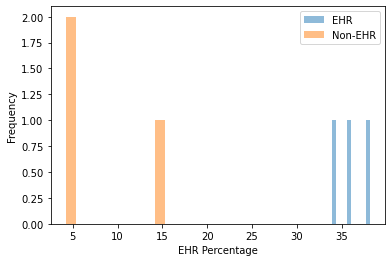

Suggested threshold: 24.58%
The file C:/mini project/dataset/ehr6.pdf is classified as: EHR

Detailed Output:
File: C:/mini project/dataset/ehr5.pdf

Cleaned and Lemmatized Text Dictionary:
headings: ['patient', 'information', 'medical', 'history', 'current']... (15 words)
bold: ['name', 'date', 'birth', 'gender', 'address']... (32 words)
italic: []... (0 words)
italian: []... (0 words)
normal: ['', '', 'sarah', 'adam', '']... (180 words)

Word Counts:
headings Word Counts:
patient: 1
information: 1
medical: 1
history: 1
current: 1
Total headings words: 15
bold Word Counts:
date: 2
diagnosis: 2
asthma: 2
management: 2
name: 1
Total bold words: 32
italic Word Counts:
Total italic words: 0
italian Word Counts:
Total italian words: 0
normal Word Counts:
: 41
asthma: 4
ra: 3
diagnosed: 3
rheumatoid: 2
Total normal words: 180
Total words in document: 227

Filtered Medical Terms:
headings: ['patient', 'diagnosis', 'medication', 'treatment', 'plan']... (5 terms)
bold: ['address', 'diagnosis',

In [3]:
import os
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import fitz  # PyMuPDF
from collections import Counter
import matplotlib.pyplot as plt

# Download NLTK resources if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')

def extract_from_pdf(file_path):
    doc = fitz.open(file_path)
    text_dict = {"headings": [], "bold": [], "italic": [], "italian": [], "normal": []}
    
    for page in doc:
        blocks = page.get_text("dict")["blocks"]
        for block in blocks:
            if "lines" in block:
                for line in block["lines"]:
                    for span in line["spans"]:
                        text = span["text"]
                        font_flags = span["flags"]
                        font_size = span["size"]
                        font = span["font"]
                        weight = span.get("weight", 400)
                        
                        # Assuming headings are text spans with a larger font size (e.g., > 14)
                        if font_size > 14:
                            text_dict["headings"].extend(text.split())
                        elif "bold" in font.lower() or font_flags & 2 or weight > 500:  # Check if the font name contains "bold", if bold flag is set, or if weight is high
                            text_dict["bold"].extend(text.split())
                        elif "italic" in font.lower() or font_flags & 1:  # Check if the font name contains "italic" or if italic flag is set
                            text_dict["italic"].extend(text.split())
                        elif "italian" in font.lower() or "italico" in font.lower():  # Check if the font name contains "italian" or "italico"
                            text_dict["italian"].extend(text.split())
                        else:
                            text_dict["normal"].extend(text.split())
                    
    return text_dict

def extract_text(file_path):
    _, file_extension = os.path.splitext(file_path)
    file_extension = file_extension.lower()
    
    if file_extension == ".pdf":
        return extract_from_pdf(file_path)
    else:
        raise ValueError("Unsupported file type. Please use a file with extension 'pdf'.")

def clean_and_lemmatize(text_dict):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    punctuations = string.punctuation + ""  # Add any other specific symbols to remove
    
    cleaned_dict = {key: [lemmatizer.lemmatize(value.lower().strip(punctuations)) for value in values if value.lower().strip(punctuations) not in stop_words] for key, values in text_dict.items()}
    
    return cleaned_dict

def print_text_dict(text_dict):
    for key, values in text_dict.items():
        print(f"{key}: {values[:5]}... ({len(values)} words)")

def count_words(text_dict):
    word_counts = {key: Counter(values) for key, values in text_dict.items()}
    return word_counts

def total_counts(word_counts):
    total_count = sum(sum(counts.values()) for counts in word_counts.values())
    return total_count

def filter_medical_terms(text_dict, medical_terms):
    filtered_dict = {}
    medical_terms_set = set(medical_terms)  # Convert to set for faster lookup
    
    for key, values in text_dict.items():
        filtered_values = [value for value in values if value in medical_terms_set]
        filtered_dict[key] = filtered_values
    
    return filtered_dict

def print_filtered_counts(filtered_dict):
    for key, values in filtered_dict.items():
        print(f"{key}: {values[:5]}... ({len(values)} terms)")

def calculate_percentage(cleaned_dict, filtered_dict, weights):
    total_words = sum(len(values) for values in cleaned_dict.values())
    weighted_count = sum(len(filtered_dict[key]) * weights[key] for key in filtered_dict.keys())
    percentage = (weighted_count / total_words) * 100
    return percentage

# Define a function to calculate the percentage for a given PDF
def calculate_ehr_percentage(file_path, medical_terms, weights):
    text_dict = extract_text(file_path)
    cleaned_dict = clean_and_lemmatize(text_dict)
    filtered_dict = filter_medical_terms(cleaned_dict, medical_terms)
    percentage = calculate_percentage(cleaned_dict, filtered_dict, weights)
    return percentage

# Sample paths (you should replace these with actual file paths)
ehr_files = ["C:/mini project/dataset/ehr4.pdf", "C:/mini project/dataset/ehr5.pdf", "C:/mini project/dataset/ehr3.pdf"]
non_ehr_files = ["C:/mini project/dataset/non_ehr1.pdf", "C:/mini project/dataset/non_ehr2.pdf", "C:/mini project/dataset/non_ehr3.pdf"]

# Define weights for each category
weights = {
    "headings": 5,  # Assign higher weight to headings
    "bold": 4,      # Assign slightly lower weight to bold
    "italic": 3,    # Assign slightly lower weight to italic
    "italian": 3,   # Assign slightly lower weight to italian
    "normal": 1     # Assign the lowest weight to normal
}

# Calculate percentages
ehr_percentages = [calculate_ehr_percentage(file, medical_terms, weights) for file in ehr_files]
non_ehr_percentages = [calculate_ehr_percentage(file, medical_terms, weights) for file in non_ehr_files]

# Plot the distributions
plt.hist(ehr_percentages, bins=10, alpha=0.5, label='EHR')
plt.hist(non_ehr_percentages, bins=10, alpha=0.5, label='Non-EHR')
plt.xlabel('EHR Percentage')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

# Analyze the distributions and decide on a threshold
threshold = (min(ehr_percentages) + max(non_ehr_percentages)) / 2
print(f"Suggested threshold: {threshold:.2f}%")

# Classify new PDFs based on the threshold
def classify_pdf(file_path, threshold, medical_terms, weights):
    percentage = calculate_ehr_percentage(file_path, medical_terms, weights)
    return "EHR" if percentage >= threshold else "Non-EHR"

# Example classification
new_file_path = "C:/mini project/dataset/ehr6.pdf"
classification = classify_pdf(new_file_path, threshold, medical_terms, weights)
print(f"The file {new_file_path} is classified as: {classification}")

# Example usage with detailed output
file_path = "C:/mini project/dataset/ehr5.pdf"
text_dict = extract_text(file_path)
cleaned_dict = clean_and_lemmatize(text_dict)
filtered_dict = filter_medical_terms(cleaned_dict, medical_terms)
word_counts = count_words(cleaned_dict)
total_count = total_counts(word_counts)

# Print detailed output
print("\nDetailed Output:")
print(f"File: {file_path}")
print("\nCleaned and Lemmatized Text Dictionary:")
print_text_dict(cleaned_dict)
print("\nWord Counts:")
for key, counts in word_counts.items():
    print(f"{key} Word Counts:")
    for word, count in counts.most_common(5):
        print(f"{word}: {count}")
    print(f"Total {key} words: {sum(counts.values())}")
print(f"Total words in document: {total_count}")
print("\nFiltered Medical Terms:")
print_filtered_counts(filtered_dict)


In [4]:
import os
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import fitz  # PyMuPDF
from collections import Counter
import matplotlib.pyplot as plt

# Download NLTK resources if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')

def extract_from_pdf(file_path):
    doc = fitz.open(file_path)
    text_dict = {"headings": [], "bold": [], "italic": [], "italian": [], "normal": []}
    
    for page in doc:
        blocks = page.get_text("dict")["blocks"]
        for block in blocks:
            if "lines" in block:
                for line in block["lines"]:
                    for span in line["spans"]:
                        text = span["text"]
                        font_flags = span["flags"]
                        font_size = span["size"]
                        font = span["font"]
                        weight = span.get("weight", 400)
                        
                        # Assuming headings are text spans with a larger font size (e.g., > 14)
                        if font_size > 14:
                            text_dict["headings"].extend(text.split())
                        elif "bold" in font.lower() or font_flags & 2 or weight > 500:  # Check if the font name contains "bold", if bold flag is set, or if weight is high
                            text_dict["bold"].extend(text.split())
                        elif "italic" in font.lower() or font_flags & 1:  # Check if the font name contains "italic" or if italic flag is set
                            text_dict["italic"].extend(text.split())
                        elif "italian" in font.lower() or "italico" in font.lower():  # Check if the font name contains "italian" or "italico"
                            text_dict["italian"].extend(text.split())
                        else:
                            text_dict["normal"].extend(text.split())
                    
    return text_dict

def extract_text(file_path):
    _, file_extension = os.path.splitext(file_path)
    file_extension = file_extension.lower()
    
    if file_extension == ".pdf":
        return extract_from_pdf(file_path)
    else:
        raise ValueError("Unsupported file type. Please use a file with extension 'pdf'.")

def clean_and_lemmatize(text_dict):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    punctuations = string.punctuation + ""  # Add any other specific symbols to remove
    
    cleaned_dict = {key: [lemmatizer.lemmatize(value.lower().strip(punctuations)) for value in values if value.lower().strip(punctuations) not in stop_words] for key, values in text_dict.items()}
    
    return cleaned_dict

def print_text_dict(text_dict):
    for key, values in text_dict.items():
        print(f"{key}: {values[:5]}... ({len(values)} words)")

def count_words(text_dict):
    word_counts = {key: Counter(values) for key, values in text_dict.items()}
    return word_counts

def total_counts(word_counts):
    total_count = sum(sum(counts.values()) for counts in word_counts.values())
    return total_count

def filter_medical_terms(text_dict, medical_terms):
    filtered_dict = {}
    medical_terms_set = set(medical_terms)  # Convert to set for faster lookup
    
    for key, values in text_dict.items():
        filtered_values = [value for value in values if value in medical_terms_set]
        filtered_dict[key] = filtered_values
    
    return filtered_dict

def print_filtered_counts(filtered_dict):
    for key, values in filtered_dict.items():
        print(f"{key}: {values[:5]}... ({len(values)} terms)")

def calculate_percentage(cleaned_dict, filtered_dict, weights):
    total_words = sum(len(values) for values in cleaned_dict.values())
    weighted_count = sum(len(filtered_dict[key]) * weights[key] for key in filtered_dict.keys())
    percentage = (weighted_count / total_words) * 100
    return percentage

# Define a function to calculate the percentage for a given PDF
def calculate_ehr_percentage(file_path, medical_terms, weights):
    text_dict = extract_text(file_path)
    cleaned_dict = clean_and_lemmatize(text_dict)
    filtered_dict = filter_medical_terms(cleaned_dict, medical_terms)
    percentage = calculate_percentage(cleaned_dict, filtered_dict, weights)
    return percentage

# List of medical terms
medical_terms = [
    "abdomen", "allergy", "antibody", "apnea", "blood pressure", "bmi", "calcium",
    "cholesterol", "chronic", "cough", "diagnosis", "disability", "ecg", "eeg", "emergency department",
    "family history", "fever", "glucose", "hpi", "immunization", "infection", "injury", "laboratory",
    "medication", "nausea", "neurology", "pain", "pathology", "physical exam", "prescription", "radiology",
    "respiratory rate", "screening", "surgery", "symptom", "temperature", "treatment", "ultrasound",
    "vaccination", "vital signs", "x-ray", "cardiovascular", "dermatology", "endocrinology",
    "gastroenterology", "hematology", "nephrology", "neurology", "oncology", "ophthalmology", "orthopedics",
    "otolaryngology", "pediatrics", "psychiatry", "pulmonary", "reproductive health", "urology", "biopsy",
    "blood test", "catheterization", "colonoscopy", "ct scan", "dialysis", "endoscopy", "intravenous",
    "lumbar puncture", "mammography", "mri", "antibiotic", "antidepressant", "antihistamine", "aspirin",
    "insulin", "steroid", "codeine", "family practice", "hospice", "hospice care", "nurse practitioner",
    "occupational therapy", "physical therapy", "prognosis", "rehabilitation", "specialist", "urgent care",
    "doctor-patient relationship", "patient", "mental capacity", "clinical history", "stroke", "cardiac failure",
    "chronic renal disease", "hypertension", "hyperlipidemia", "cardiomyopathy", "rehabilitation",
    "behavioural symptoms", "psychological symptoms", "dementia", "physical examination",
    "mental state examination", "ct brain scan", "mri brain scan", "medicine", "routine check-up",
    "management of chronic conditions", "diagnosis", "type 2 diabetes mellitus", "blood pressure",
    "blood tests", "hba1c", "lipid profile", "lifestyle changes", "diet", "exercise", "smoking cessation",
    "contact information", "address", "phone", "email", "emergency contact", "medical history",
    "allergies", "past medical history", "surgeries", "family history", "medications", "immunizations",
    "vital signs", "progress notes", "provider", "notes", "radiology reports", "chest x-ray",
    "Rheumatoid Arthritis", "Hypothyroidism", "Asthma", "Diagnosis", "Rheumatoid", "Arthritis", "Diagnoses",
    "Hypothyroidism", "diagnosed", "Asthma", "Allergies", "reported", "thyroid", "Conditions", "Methotrexate",
    "Hydroxychloroquine", "Hypothyroidism", "Albuterol", "inhaler", "Monitor", "lab", "tests", "Levothyroxine",
    "diet", "symptoms", "health", "Diagnosis", "Rheumatoid", "Arthritis", "Diagnoses", "Hypothyroidism",
    "diagnosed", "Asthma", "Allergies", "reported", "thyroid", "Conditions", "Methotrexate",
    "Hydroxychloroquine", "Hypothyroidism", "Albuterol", "inhaler", "Monitor", "lab", "tests", "Levothyroxine",
    "diet", "symptoms", "health", "rheumatology", "appointment", "blood", "count", "metabolic", "pain",
    "therapy", "patient", "medication", "regimen", "Allergies", "Methotrexate", "Hydroxychloroquine",
    "Levothyroxine", "Type 2 Diabetes Mellitus", "Diabetes", "Hypertension", "Metformin", "Lisinopril",
    "Allergies", "Blood", "glucose", "levels", "Blood pressure", "HbA1c (Glycated hemoglobin)", "Lipid panel",
    "Endocrinology", "Medications", "Routine follow-up", "Diagnosis", "Treatment", "plan", "Lab", "tests",
    "Patient", "Hospital", "Medical history", "Management", "Healthcare", "Examination", "Complications",
    "Lifestyle", "Diet", "Exercise", "Smoking cessation", "Fatigue", "Symptoms", "Visit", "Appointment",
    "Albuterol inhaler", "CRP (C-reactive protein)", "ESR (Erythrocyte sedimentation rate)",
    "TSH (Thyroid-stimulating hormone)", "T4 (Thyroxine)", "Asthma exacerbation", "Coronary artery disease (CAD)",
    "Coronary artery bypass grafting (CABG)", "Lisinopril", "Metformin", "Atorvastatin", "Furosemide",
    "HbA1c (Glycated hemoglobin)", "Glucose", "Cardiovascular", "Nephropathy", "Diabetic", "Surgery", "Bypass",
    "Artery", "mg (milligram)", "Diagnosis", "Blood", "Therapy", "Exercises", "Medications", "Joint pain",
    "Stiffness", "Wheezing", "Inhaler", "Hypertension", "Type 2 Diabetes Mellitus", "Hyperlipidemia",
    "Blood pressure", "Pulse", "Routine check-up", "Management", "Follow-up", "Lifestyle changes", "Diet",
    "Smoking cessation", "Prescription", "Side effects"
]

# Define weights for each category
weights = {
    "headings": 5,  # Assign higher weight to headings
    "bold": 4,      # Assign slightly lower weight to bold
    "italic": 3,    # Assign slightly lower weight to italic
    "italian": 3,   # Assign slightly lower weight to italian
    "normal": 1     # Assign the lowest weight to normal
}

def main():
    # Prompt user for a PDF file path
    file_path = input("Enter the file path of the PDF document: ").strip()
    
    try:
        # Calculate EHR percentage for the specified file
        percentage = calculate_ehr_percentage(file_path, medical_terms, weights)
        print(f"EHR Percentage for {file_path}: {percentage:.2f}%")
        
        # Perform classification based on threshold
        threshold = 50  # Set your desired threshold here
        classification = "EHR" if percentage >= threshold else "Non-EHR"
        print(f"Classification: {classification}")
        
        # Example usage with detailed output
        text_dict = extract_text(file_path)
        cleaned_dict = clean_and_lemmatize(text_dict)
        filtered_dict = filter_medical_terms(cleaned_dict, medical_terms)
        word_counts = count_words(cleaned_dict)
        total_count = total_counts(word_counts)
        
        # Print detailed output
        print("\nDetailed Output:")
        print(f"File: {file_path}")
        print("\nCleaned and Lemmatized Text Dictionary:")
        print_text_dict(cleaned_dict)
        print("\nWord Counts:")
        for key, counts in word_counts.items():
            print(f"{key} Word Counts:")
            for word, count in counts.most_common(5):
                print(f"{word}: {count}")
            print(f"Total {key} words: {sum(counts.values())}")
        print(f"Total words in document: {total_count}")
        print("\nFiltered Medical Terms:")
        print_filtered_counts(filtered_dict)
        
    except Exception as e:
        print(f"Error processing file {file_path}: {str(e)}")

if __name__ == "__main__":
    main()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\himav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Enter the file path of the PDF document: ehr2
Error processing file ehr2: Unsupported file type. Please use a file with extension 'pdf'.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\himav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


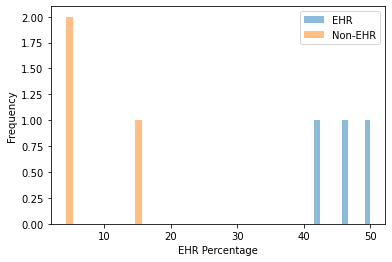

Suggested threshold: 28.69%
The file C:/mini project/dataset/ehr6.pdf is classified as: EHR


In [5]:
import os
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import fitz  # PyMuPDF
import matplotlib.pyplot as plt

# Download NLTK resources if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Define the list of medical terms
medical_terms = [
    # General Medical Terms
    "abdomen", "allergy", "antibody", "apnea", "blood pressure", "bmi", "calcium",
    "cholesterol", "chronic", "cough", "diagnosis", "disability", "ecg", "eeg", "emergency department",
    "family history", "fever", "glucose", "hpi", "immunization", "infection", "injury", "laboratory",
    "medication", "nausea", "neurology", "pain", "pathology", "physical exam", "prescription", "radiology",
    "respiratory rate", "screening", "surgery", "symptom", "temperature", "treatment", "ultrasound",
    "vaccination", "vital signs", "x-ray",

    # Body Systems
    "cardiovascular", "dermatology", "endocrinology", "gastroenterology", "hematology", "nephrology",
    "neurology", "oncology", "ophthalmology", "orthopedics", "otolaryngology", "pediatrics", "psychiatry",
    "pulmonary", "reproductive health", "urology",

    # Procedures and Tests
    "biopsy", "blood test", "catheterization", "colonoscopy", "ct scan", "dialysis", "endoscopy",
    "intravenous", "lumbar puncture", "mammography", "mri",

    # Medications (just a few examples)
    "antibiotic", "antidepressant", "antihistamine", "aspirin", "insulin", "steroid",

    # Other
    "codeine", "family practice", "hospice", "hospice care", "nurse practitioner", "occupational therapy",
    "physical therapy", "prognosis", "rehabilitation", "specialist", "urgent care",
    
    # Newly extracted terms
    "doctor-patient relationship", "patient", "mental capacity", "clinical history", "stroke", "cardiac failure",
    "chronic renal disease", "hypertension", "hyperlipidemia", "cardiomyopathy", "rehabilitation",
    "behavioural symptoms", "psychological symptoms", "dementia", "physical examination",
    "mental state examination", "ct brain scan", "mri brain scan", "medicine", "routine check-up",
    "management of chronic conditions", "diagnosis", "type 2 diabetes mellitus", "blood pressure",
    "blood tests", "hba1c", "lipid profile", "lifestyle changes", "diet", "exercise", "smoking cessation",
    "contact information", "address", "phone", "email", "emergency contact", "medical history",
    "allergies", "past medical history", "surgeries", "family history", "medications", "immunizations",
    "vital signs", "progress notes", "provider", "notes", "radiology reports", "chest x-ray","Rheumatoid Arthritis",
    "Hypothyroidism",
    "Asthma",
    "Diagnosis",
    "Rheumatoid",
    "Arthritis",
    "Diagnoses",
    "Hypothyroidism",
    "diagnosed",
    "Asthma",
    "Allergies",
    "reported",
    "thyroid",
    "Conditions",
    "Methotrexate",
    "Hydroxychloroquine",
    "Hypothyroidism",
    "Albuterol",
    "inhaler",
    "Monitor",
    "lab",
    "tests",
    "Levothyroxine",
    "diet",
    "symptoms",
    "health",
    "Diagnosis",
    "Rheumatoid",
    "Arthritis",
    "Diagnoses",
    "Hypothyroidism",
    "diagnosed",
    "Asthma",
    "Allergies",
    "reported",
    "thyroid",
    "Conditions",
    "Methotrexate",
    "Hydroxychloroquine",
    "Hypothyroidism",
    "Albuterol",
    "inhaler",
    "Monitor",
    "lab",
    "tests",
    "Levothyroxine",
    "diet",
    "symptoms",
    "health",
    "rheumatology",
    "appointment",
    "blood",
    "count",
    "metabolic",
    "pain",
    "therapy",
    "patient",
    "medication",
    "regimen",
    "Allergies",
    "Methotrexate",
    "Hydroxychloroquine",
    "Levothyroxine",
    "Type 2 Diabetes Mellitus",
    "Diabetes",
    "Hypertension",
    "Metformin",
    "Lisinopril",
    "Allergies",
    "Blood",
    "glucose",
    "levels",
    "Blood pressure",
    "HbA1c (Glycated hemoglobin)",
    "Lipid panel",
    "Endocrinology",
    "Medications",
    "Routine follow-up",
    "Diagnosis",
    "Treatment",
    "plan",
    "Lab",
    "tests",
    "Patient",
    "Hospital",
    "Medical history",
    "Management",
    "Healthcare",
    "Examination",
    "Complications",
    "Lifestyle",
    "Diet",
    "Exercise",
    "Smoking cessation",
    "Fatigue",
    "Symptoms",
    "Visit",
    "Appointment",
    "Albuterol inhaler",
    "CRP (C-reactive protein)",
    "ESR (Erythrocyte sedimentation rate)",
    "TSH (Thyroid-stimulating hormone)",
    "T4 (Thyroxine)",
    "Asthma exacerbation",
    "Coronary artery disease (CAD)",
    "Coronary artery bypass grafting (CABG)",
    "Lisinopril",
    "Metformin",
    "Atorvastatin",
    "Furosemide",
    "HbA1c (Glycated hemoglobin)",
    "Glucose",
    "Cardiovascular",
    "Nephropathy",
    "Diabetic",
    "Surgery",
    "Bypass",
    "Artery",
    "mg (milligram)",
    "Diagnosis",
    "Blood",
    "Therapy",
    "Exercises",
    "Medications",
    "Joint pain",
    "Stiffness",
    "Wheezing",
    "Inhaler",
    "Hypertension",
    "Type 2 Diabetes Mellitus",
    "Hyperlipidemia",
    "Blood pressure",
    "Pulse",
    "Routine check-up",
    "Management",
    "Follow-up",
    "Lifestyle changes",
    "Diet",
    "Smoking cessation",
    "Prescription",
    "Side effects"
]

def extract_from_pdf(file_path):
    doc = fitz.open(file_path)
    text_dict = {"headings": [], "bold": [], "italic": [], "italian": [], "normal": []}
    
    for page in doc:
        blocks = page.get_text("dict")["blocks"]
        for block in blocks:
            if "lines" in block:
                for line in block["lines"]:
                    for span in line["spans"]:
                        text = span["text"]
                        font_flags = span["flags"]
                        font_size = span["size"]
                        font = span["font"]
                        weight = span.get("weight", 400)
                        
                        # Assuming headings are text spans with a larger font size (e.g., > 14)
                        if font_size > 14:
                            text_dict["headings"].extend(text.split())
                        elif "bold" in font.lower() or font_flags & 2 or weight > 500:  # Check if the font name contains "bold", if bold flag is set, or if weight is high
                            text_dict["bold"].extend(text.split())
                        elif "italic" in font.lower() or font_flags & 1:  # Check if the font name contains "italic" or if italic flag is set
                            text_dict["italic"].extend(text.split())
                        elif "italian" in font.lower() or "italico" in font.lower():  # Check if the font name contains "italian" or "italico"
                            text_dict["italian"].extend(text.split())
                        else:
                            text_dict["normal"].extend(text.split())
                    
    return text_dict

def extract_text(file_path):
    _, file_extension = os.path.splitext(file_path)
    file_extension = file_extension.lower()
    
    if file_extension == ".pdf":
        return extract_from_pdf(file_path)
    else:
        raise ValueError("Unsupported file type. Please use a file with extension 'pdf'.")

def clean_and_lemmatize(text_dict):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    punctuations = string.punctuation + ""  # Add any other specific symbols to remove
    
    cleaned_dict = {}
    for key, values in text_dict.items():
        cleaned_values = []
        for value in values:
            value = value.lower().strip(punctuations)
            if value and value not in stop_words:
                lemmatized_value = lemmatizer.lemmatize(value)
                cleaned_values.append(lemmatized_value)
        cleaned_dict[key] = cleaned_values
    
    return cleaned_dict

def count_words(text_dict):
    word_counts = {key: len(values) for key, values in text_dict.items()}
    return word_counts

def total_counts(word_counts):
    total_count = sum(word_counts.values())
    return total_count

def filter_medical_terms(text_dict, medical_terms):
    filtered_dict = {}
    medical_terms_set = set(medical_terms)  # Convert to set for faster lookup
    
    for key, values in text_dict.items():
        filtered_values = [value for value in values if value in medical_terms_set]
        filtered_dict[key] = filtered_values
    
    return filtered_dict

def calculate_percentage(cleaned_dict, filtered_dict, weights):
    # Calculate the total number of words from the cleaned dictionary
    total_words = sum(len(values) for values in cleaned_dict.values())
    
    # Calculate the weighted count from the filtered dictionary
    weighted_count = sum(len(filtered_dict[key]) * weights[key] for key in filtered_dict.keys())
    
    # Calculate the percentage
    percentage = (weighted_count / total_words) * 100
    return percentage

# Define a function to calculate the percentage for a given PDF
def calculate_ehr_percentage(file_path, medical_terms, weights):
    text_dict = extract_text(file_path)
    cleaned_dict = clean_and_lemmatize(text_dict)
    filtered_dict = filter_medical_terms(cleaned_dict, medical_terms)
    percentage = calculate_percentage(cleaned_dict, filtered_dict, weights)
    return percentage

# Sample paths (you should replace these with actual file paths)
ehr_files = ["C:/mini project/dataset/ehr4.pdf", "C:/mini project/dataset/ehr5.pdf", "C:/mini project/dataset/ehr3.pdf"]
non_ehr_files = ["C:/mini project/dataset/non_ehr1.pdf", "C:/mini project/dataset/non_ehr2.pdf", "C:/mini project/dataset/non_ehr3.pdf"]

# Define weights for each category
weights = {
    "headings": 5,  # Assign higher weight to headings
    "bold": 4,      # Assign slightly lower weight to bold
    "italic": 3,    # Assign slightly lower weight to italic
    "italian": 3,   # Assign slightly lower weight to italian
    "normal": 1     # Assign the lowest weight to normal
}

# Calculate percentages
ehr_percentages = [calculate_ehr_percentage(file, medical_terms, weights) for file in ehr_files]
non_ehr_percentages = [calculate_ehr_percentage(file, medical_terms, weights) for file in non_ehr_files]

# Plot the distributions
plt.hist(ehr_percentages, bins=10, alpha=0.5, label='EHR')
plt.hist(non_ehr_percentages, bins=10, alpha=0.5, label='Non-EHR')
plt.xlabel('EHR Percentage')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

# Analyze the distributions and decide on a threshold
# For example, if there's a clear gap between EHR and non-EHR percentages
threshold = (min(ehr_percentages) + max(non_ehr_percentages)) / 2
print(f"Suggested threshold: {threshold:.2f}%")

# Classify new PDFs based on the threshold
def classify_pdf(file_path, threshold, medical_terms, weights):
    percentage = calculate_ehr_percentage(file_path, medical_terms, weights)
    return "EHR" if percentage >= threshold else "Non-EHR"

# Example classification
new_file_path = "C:/mini project/dataset/ehr6.pdf"
classification = classify_pdf(new_file_path, threshold, medical_terms, weights)
print(f"The file {new_file_path} is classified as: {classification}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\himav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Processing Pages: 100%|█████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 412.30it/s]


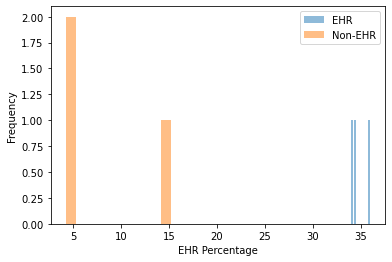

Suggested threshold: 24.58%
Enter the path to a new PDF file: C:/mini project/dataset/ehr2.pdf


Processing Pages: 100%|█████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 221.94it/s]

The file C:/mini project/dataset/ehr2.pdf is classified as: EHR


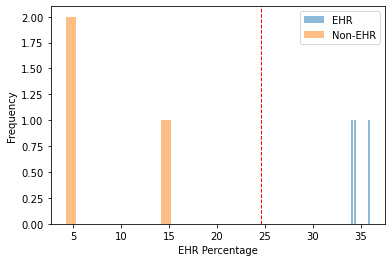

Processing Pages: 100%|█████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 282.06it/s]

Report for C:/mini project/dataset/ehr2.pdf:
EHR Content Percentage: 38.62%
Word Counts:
  headings: 23
  bold: 52
  italic: 0
  italian: 0
  normal: 272
Filtered Word Counts:
  headings: 9
  bold: 15
  italic: 0
  italian: 0
  normal: 29



In [9]:
import os
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import fitz  # PyMuPDF
import matplotlib.pyplot as plt

# Download NLTK resources if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Define the list of medical terms
medical_terms = [
    "abdomen", "allergy", "antibody", "apnea", "blood pressure", "bmi", "calcium",
    "cholesterol", "chronic", "cough", "diagnosis", "disability", "ecg", "eeg", "emergency department",
    "family history", "fever", "glucose", "hpi", "immunization", "infection", "injury", "laboratory",
    "medication", "nausea", "neurology", "pain", "pathology", "physical exam", "prescription", "radiology",
    "respiratory rate", "screening", "surgery", "symptom", "temperature", "treatment", "ultrasound",
    "vaccination", "vital signs", "x-ray", "cardiovascular", "dermatology", "endocrinology",
    "gastroenterology", "hematology", "nephrology", "neurology", "oncology", "ophthalmology", "orthopedics",
    "otolaryngology", "pediatrics", "psychiatry", "pulmonary", "reproductive health", "urology", "biopsy",
    "blood test", "catheterization", "colonoscopy", "ct scan", "dialysis", "endoscopy", "intravenous",
    "lumbar puncture", "mammography", "mri", "antibiotic", "antidepressant", "antihistamine", "aspirin",
    "insulin", "steroid", "codeine", "family practice", "hospice", "hospice care", "nurse practitioner",
    "occupational therapy", "physical therapy", "prognosis", "rehabilitation", "specialist", "urgent care",
    "doctor-patient relationship", "patient", "mental capacity", "clinical history", "stroke", "cardiac failure",
    "chronic renal disease", "hypertension", "hyperlipidemia", "cardiomyopathy", "rehabilitation",
    "behavioural symptoms", "psychological symptoms", "dementia", "physical examination",
    "mental state examination", "ct brain scan", "mri brain scan", "medicine", "routine check-up",
    "management of chronic conditions", "diagnosis", "type 2 diabetes mellitus", "blood pressure",
    "blood tests", "hba1c", "lipid profile", "lifestyle changes", "diet", "exercise", "smoking cessation",
    "contact information", "address", "phone", "email", "emergency contact", "medical history",
    "allergies", "past medical history", "surgeries", "family history", "medications", "immunizations",
    "vital signs", "progress notes", "provider", "notes", "radiology reports", "chest x-ray",
    "Rheumatoid Arthritis", "Hypothyroidism", "Asthma", "Diagnosis", "Rheumatoid", "Arthritis", "Diagnoses",
    "Hypothyroidism", "diagnosed", "Asthma", "Allergies", "reported", "thyroid", "Conditions", "Methotrexate",
    "Hydroxychloroquine", "Hypothyroidism", "Albuterol", "inhaler", "Monitor", "lab", "tests", "Levothyroxine",
    "diet", "symptoms", "health", "Diagnosis", "Rheumatoid", "Arthritis", "Diagnoses", "Hypothyroidism",
    "diagnosed", "Asthma", "Allergies", "reported", "thyroid", "Conditions", "Methotrexate",
    "Hydroxychloroquine", "Hypothyroidism", "Albuterol", "inhaler", "Monitor", "lab", "tests", "Levothyroxine",
    "diet", "symptoms", "health", "rheumatology", "appointment", "blood", "count", "metabolic", "pain",
    "therapy", "patient", "medication", "regimen", "Allergies", "Methotrexate", "Hydroxychloroquine",
    "Levothyroxine", "Type 2 Diabetes Mellitus", "Diabetes", "Hypertension", "Metformin", "Lisinopril",
    "Allergies", "Blood", "glucose", "levels", "Blood pressure", "HbA1c (Glycated hemoglobin)", "Lipid panel",
    "Endocrinology", "Medications", "Routine follow-up", "Diagnosis", "Treatment", "plan", "Lab", "tests",
    "Patient", "Hospital", "Medical history", "Management", "Healthcare", "Examination", "Complications",
    "Lifestyle", "Diet", "Exercise", "Smoking cessation", "Fatigue", "Symptoms", "Visit", "Appointment",
    "Albuterol inhaler", "CRP (C-reactive protein)", "ESR (Erythrocyte sedimentation rate)",
    "TSH (Thyroid-stimulating hormone)", "T4 (Thyroxine)", "Asthma exacerbation", "Coronary artery disease (CAD)",
    "Coronary artery bypass grafting (CABG)", "Lisinopril", "Metformin", "Atorvastatin", "Furosemide",
    "HbA1c (Glycated hemoglobin)", "Glucose", "Cardiovascular", "Nephropathy", "Diabetic", "Surgery", "Bypass",
    "Artery", "mg (milligram)", "Diagnosis", "Blood", "Therapy", "Exercises", "Medications", "Joint pain",
    "Stiffness", "Wheezing", "Inhaler", "Hypertension", "Type 2 Diabetes Mellitus", "Hyperlipidemia",
    "Blood pressure", "Pulse", "Routine check-up", "Management", "Follow-up", "Lifestyle changes", "Diet",
    "Smoking cessation", "Prescription", "Side effects"
]

def extract_from_pdf(file_path):
    doc = fitz.open(file_path)
    text_dict = {"headings": [], "bold": [], "italic": [], "italian": [], "normal": []}
    
    for page in tqdm(doc, desc="Processing Pages"):
        blocks = page.get_text("dict")["blocks"]
        for block in blocks:
            if "lines" in block:
                for line in block["lines"]:
                    for span in line["spans"]:
                        text = span["text"]
                        font_size = span["size"]
                        font_flags = span["flags"]
                        font = span["font"]
                        weight = span.get("weight", 400)

                        if font_size > 14:
                            text_dict["headings"].extend(text.split())
                        elif "bold" in font.lower() or font_flags & 2 or weight > 500:
                            text_dict["bold"].extend(text.split())
                        elif "italic" in font.lower() or font_flags & 1:
                            text_dict["italic"].extend(text.split())
                        elif "italian" in font.lower() or "italico" in font.lower():
                            text_dict["italian"].extend(text.split())
                        else:
                            text_dict["normal"].extend(text.split())
    
    return text_dict

def extract_text(file_path):
    _, file_extension = os.path.splitext(file_path)
    file_extension = file_extension.lower()
    
    if file_extension == ".pdf":
        return extract_from_pdf(file_path)
    else:
        raise ValueError("Unsupported file type. Please use a file with extension 'pdf'.")

def clean_and_lemmatize(text_dict):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    punctuations = string.punctuation + ""  # Add specific symbols to remove
    
    cleaned_dict = {}
    for key, values in text_dict.items():
        cleaned_values = [
            lemmatizer.lemmatize(value.lower().strip(punctuations))
            for value in values if value and value.lower().strip(punctuations) not in stop_words
        ]
        cleaned_dict[key] = cleaned_values
    
    return cleaned_dict

def print_text_dict(text_dict):
    for key, values in text_dict.items():
        print(f"{key}:", values)

def count_words(text_dict):
    return {key: len(values) for key, values in text_dict.items()}

def total_counts(word_counts):
    return sum(word_counts.values())

def filter_medical_terms(text_dict, medical_terms):
    filtered_dict = {}
    medical_terms_set = set(medical_terms)
    
    for key, values in text_dict.items():
        filtered_values = [value for value in values if value in medical_terms_set]
        filtered_dict[key] = filtered_values
    
    return filtered_dict

def print_filtered_counts(filtered_dict):
    filtered_word_counts = {key: len(values) for key, values in filtered_dict.items()}
    for key, count in filtered_word_counts.items():
        print(f"{key}: {count}")

def calculate_percentage(cleaned_dict, filtered_dict, weights):
    total_words = sum(len(values) for values in cleaned_dict.values())
    weighted_count = sum(len(filtered_dict[key]) * weights[key] for key in filtered_dict.keys())
    return (weighted_count / total_words) * 100

def calculate_ehr_percentage(file_path, medical_terms, weights):
    text_dict = extract_text(file_path)
    cleaned_dict = clean_and_lemmatize(text_dict)
    filtered_dict = filter_medical_terms(cleaned_dict, medical_terms)
    return calculate_percentage(cleaned_dict, filtered_dict, weights)

def generate_report(file_path, percentage, word_counts, filtered_word_counts):
    report = f"Report for {file_path}:\n"
    report += f"EHR Content Percentage: {percentage:.2f}%\n"
    report += "Word Counts:\n"
    for key, count in word_counts.items():
        report += f"  {key}: {count}\n"
    report += "Filtered Word Counts:\n"
    for key, count in filtered_word_counts.items():
        report += f"  {key}: {count}\n"
    return report

def visualize_threshold(ehr_percentages, non_ehr_percentages, threshold):
    plt.hist(ehr_percentages, bins=10, alpha=0.5, label='EHR')
    plt.hist(non_ehr_percentages, bins=10, alpha=0.5, label='Non-EHR')
    plt.axvline(threshold, color='red', linestyle='dashed', linewidth=1)
    plt.xlabel('EHR Percentage')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()

def classify_pdf(file_path, threshold, medical_terms, weights):
    percentage = calculate_ehr_percentage(file_path, medical_terms, weights)
    return "EHR" if percentage >= threshold else "Non-EHR"

# Sample paths (you should replace these with actual file paths)
ehr_files = ["C:/mini project/dataset/ehr4.pdf", "C:/mini project/dataset/ehr5.pdf", "C:/mini project/dataset/ehr6.pdf"]
non_ehr_files = ["C:/mini project/dataset/non_ehr1.pdf", "C:/mini project/dataset/non_ehr2.pdf", "C:/mini project/dataset/non_ehr3.pdf"]

# Define weights for each category
weights = {
    "headings": 5,  # Assign higher weight to headings
    "bold": 4,      # Assign slightly lower weight to bold
    "italic": 3,    # Assign slightly lower weight to italic
    "italian": 3,   # Assign slightly lower weight to italian
    "normal": 1     # Assign the lowest weight to normal
}

# Calculate percentages for EHR and non-EHR files
ehr_percentages = [calculate_ehr_percentage(file, medical_terms, weights) for file in ehr_files]
non_ehr_percentages = [calculate_ehr_percentage(file, medical_terms, weights) for file in non_ehr_files]

# Plot the distributions
plt.hist(ehr_percentages, bins=10, alpha=0.5, label='EHR')
plt.hist(non_ehr_percentages, bins=10, alpha=0.5, label='Non-EHR')
plt.xlabel('EHR Percentage')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

# Analyze the distributions and decide on a threshold
threshold = (min(ehr_percentages) + max(non_ehr_percentages)) / 2
print(f"Suggested threshold: {threshold:.2f}%")

# Example classification
new_file_path = input("Enter the path to a new PDF file: ").strip()
classification = classify_pdf(new_file_path, threshold, medical_terms, weights)
print(f"The file {new_file_path} is classified as: {classification}")

# Visualize the threshold
visualize_threshold(ehr_percentages, non_ehr_percentages, threshold)

# Generate and print a report for the specified file
file_path = new_file_path
percentage = calculate_ehr_percentage(file_path, medical_terms, weights)
text_dict = extract_text(file_path)
cleaned_dict = clean_and_lemmatize(text_dict)
word_counts = count_words(cleaned_dict)
filtered_dict = filter_medical_terms(cleaned_dict, medical_terms)
filtered_word_counts = {key: len(values) for key, values in filtered_dict.items()}
report = generate_report(file_path, percentage, word_counts, filtered_word_counts)
print(report)


In [ ]:
import os
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import fitz  # PyMuPDF
import logging
import concurrent.futures
import matplotlib.pyplot as plt
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.chunk import conlltags2tree, tree2conlltags

# Download NLTK resources if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Define the list of medical terms
medical_terms = [
    # General Medical Terms
    "abdomen", "allergy", "antibody", "apnea", "blood pressure", "bmi", "calcium",
    "cholesterol", "chronic", "cough", "diagnosis", "disability", "ecg", "eeg", "emergency department",
    "family history", "fever", "glucose", "hpi", "immunization", "infection", "injury", "laboratory",
    "medication", "nausea", "neurology", "pain", "pathology", "physical exam", "prescription", "radiology",
    "respiratory rate", "screening", "surgery", "symptom", "temperature", "treatment", "ultrasound",
    "vaccination", "vital signs", "x-ray",

    # Body Systems
    "cardiovascular", "dermatology", "endocrinology", "gastroenterology", "hematology", "nephrology",
    "neurology", "oncology", "ophthalmology", "orthopedics", "otolaryngology", "pediatrics", "psychiatry",
    "pulmonary", "reproductive health", "urology",

    # Procedures and Tests
    "biopsy", "blood test", "catheterization", "colonoscopy", "ct scan", "dialysis", "endoscopy",
    "intravenous", "lumbar puncture", "mammography", "mri",

    # Medications (just a few examples)
    "antibiotic", "antidepressant", "antihistamine", "aspirin", "insulin", "steroid",

    # Other
    "codeine", "family practice", "hospice", "hospice care", "nurse practitioner", "occupational therapy",
    "physical therapy", "prognosis", "rehabilitation", "specialist", "urgent care",

    # Newly extracted terms
    "doctor-patient relationship", "patient", "mental capacity", "clinical history", "stroke", "cardiac failure",
    "chronic renal disease", "hypertension", "hyperlipidemia", "cardiomyopathy", "rehabilitation",
    "behavioural symptoms", "psychological symptoms", "dementia", "physical examination",
    "mental state examination", "ct brain scan", "mri brain scan", "medicine", "routine check-up",
    "management of chronic conditions", "diagnosis", "type 2 diabetes mellitus", "blood pressure",
    "blood tests", "hba1c", "lipid profile", "lifestyle changes", "diet", "exercise", "smoking cessation",
    "contact information", "address", "phone", "email", "emergency contact", "medical history",
    "allergies", "past medical history", "surgeries", "family history", "medications", "immunizations",
    "vital signs", "progress notes", "provider", "notes", "radiology reports", "chest x-ray","Rheumatoid Arthritis",
    "Hypothyroidism",
    "Asthma",
    "Diagnosis",
    "Rheumatoid",
    "Arthritis",
    "Diagnoses",
    "Hypothyroidism",
    "diagnosed",
    "Asthma",
    "Allergies",
    "reported",
    "thyroid",
    "Conditions",
    "Methotrexate",
    "Hydroxychloroquine",
    "Hypothyroidism",
    "Albuterol",
    "inhaler",
    "Monitor",
    "lab",
    "tests",
    "Levothyroxine",
    "diet",
    "symptoms",
    "health",
    "Diagnosis",
    "Rheumatoid",
    "Arthritis",
    "Diagnoses",
    "Hypothyroidism",
    "diagnosed",
    "Asthma",
    "Allergies",
    "reported",
    "thyroid",
    "Conditions",
    "Methotrexate",
    "Hydroxychloroquine",
    "Hypothyroidism",
    "Albuterol",
    "inhaler",
    "Monitor",
    "lab",
    "tests",
    "Levothyroxine",
    "diet",
    "symptoms",
    "health",
    "rheumatology",
    "appointment",
    "blood",
    "count",
    "metabolic",
    "pain",
    "therapy",
    "patient",
    "medication",
    "regimen",
    "Allergies",
    "Methotrexate",
    "Hydroxychloroquine",
    "Levothyroxine",
    "Type 2 Diabetes Mellitus",
    "Diabetes",
    "Hypertension",
    "Metformin",
    "Lisinopril",
    "Allergies",
    "Blood",
    "glucose",
    "levels",
    "Blood pressure",
    "HbA1c (Glycated hemoglobin)",
    "Lipid panel",
    "Endocrinology",
    "Medications",
    "Routine follow-up",
    "Diagnosis",
    "Treatment",
    "plan",
    "Lab",
    "tests",
    "Patient",
    "Hospital",
    "Medical history",
    "Management",
    "Healthcare",
    "Examination",
    "Complications",
    "Lifestyle",
    "Diet",
    "Exercise",
    "Smoking cessation",
    "Fatigue",
    "Symptoms",
    "Visit",
    "Appointment",
    "Albuterol inhaler",
    "CRP (C-reactive protein)",
    "ESR (Erythrocyte sedimentation rate)",
    "TSH (Thyroid-stimulating hormone)",
    "T4 (Thyroxine)",
    "Asthma exacerbation",
    "Coronary artery disease (CAD)",
    "Coronary artery bypass grafting (CABG)",
    "Lisinopril",
    "Metformin",
    "Atorvastatin",
    "Furosemide",
    "HbA1c (Glycated hemoglobin)",
    "Glucose",
    "Cardiovascular",
    "Nephropathy",
    "Diabetic",
    "Surgery",
    "Bypass",
    "Artery",
    "mg (milligram)",
    "Diagnosis",
    "Blood",
    "Therapy",
    "Exercises",
    "Medications",
    "Joint pain",
    "Stiffness",
    "Wheezing",
    "Inhaler",
    "Hypertension",
    "Type 2 Diabetes Mellitus",
    "Hyperlipidemia",
    "Blood pressure",
    "Pulse",
    "Routine check-up",
    "Management",
    "Follow-up",
    "Lifestyle changes",
    "Diet",
    "Smoking cessation",
    "Prescription",
    "Side effects"
]

def extract_from_pdf(file_path):
    try:
        doc = fitz.open(file_path)
        text_dict = {"headings": [], "bold": [], "italic": [], "italian": [], "normal": []}

        for page in doc:
            blocks = page.get_text("dict")["blocks"]
            for block in blocks:
                if "lines" in block:
                    for line in block["lines"]:
                        for span in line["spans"]:
                            text = span["text"]
                            font_flags = span["flags"]
                            font_size = span["size"]
                            font = span["font"]
                            weight = span.get("weight", 400)

                            # Assuming headings are text spans with a larger font size (e.g., > 14)
                            if font_size > 14:
                                text_dict["headings"].extend(text.split())
                            elif "bold" in font.lower() or font_flags & 2 or weight > 500:
                                text_dict["bold"].extend(text.split())
                            elif "italic" in font.lower() or font_flags & 1:
                                text_dict["italic"].extend(text.split())
                            elif "italian" in font.lower() or "italico" in font.lower():
                                text_dict["italian"].extend(text.split())
                            else:
                                text_dict["normal"].extend(text.split())

        return text_dict
    except Exception as e:
        logger.error(f"Error extracting text from {file_path}: {str(e)}")
        return None

def extract_text(file_path):
    _, file_extension = os.path.splitext(file_path)
    file_extension = file_extension.lower()

    if file_extension == ".pdf":
        return extract_from_pdf(file_path)
    else:
        logger.error(f"Unsupported file type: {file_extension}. Please provide a PDF file.")
        return None

def clean_and_lemmatize(text_dict):
    try:
        stop_words = set(stopwords.words('english'))
        lemmatizer = WordNetLemmatizer()
        punctuations = string.punctuation + ""

        cleaned_dict = {}
        for key, values in text_dict.items():
            cleaned_values = []
            for value in values:
                value = value.lower().strip(punctuations)
                if value and value not in stop_words:
                    lemmatized_value = lemmatizer.lemmatize(value)
                    cleaned_values.append(lemmatized_value)
            cleaned_dict[key] = cleaned_values

        return cleaned_dict
    except Exception as e:
        logger.error(f"Error cleaning and lemmatizing text: {str(e)}")
        return None

def count_words(text_dict):
    try:
        word_counts = {key: len(values) for key, values in text_dict.items()}
        return word_counts
    except Exception as e:
        logger.error(f"Error counting words: {str(e)}")
        return None

def total_counts(word_counts):
    try:
        total_count = sum(word_counts.values())
        return total_count
    except Exception as e:
        logger.error(f"Error calculating total counts: {str(e)}")
        return None

def filter_medical_terms(text_dict, medical_terms):
    try:
        filtered_dict = {}
        medical_terms_set = set(medical_terms)

        for key, values in text_dict.items():
            filtered_values = [value for value in values if value in medical_terms_set]
            filtered_dict[key] = filtered_values

        return filtered_dict
    except Exception as e:
        logger.error(f"Error filtering medical terms: {str(e)}")
        return None

def calculate_percentage(cleaned_dict, filtered_dict, weights):
    try:
        total_words = sum(len(values) for values in cleaned_dict.values())
        weighted_count = sum(len(filtered_dict[key]) * weights[key] for key in filtered_dict.keys())
        percentage = (weighted_count / total_words) * 100
        return percentage
    except Exception as e:
        logger.error(f"Error calculating percentage: {str(e)}")
        return None

def plot_ehr_vs_non_ehr(ehr_percentages, non_ehr_percentages):
    try:
        plt.hist(ehr_percentages, bins=10, alpha=0.5, label='EHR')
        plt.hist(non_ehr_percentages, bins=10, alpha=0.5, label='Non-EHR')
        plt.xlabel('EHR Percentage')
        plt.ylabel('Frequency')
        plt.legend(loc='upper right')
        plt.show()
    except Exception as e:
        logger.error(f"Error plotting EHR vs Non-EHR histograms: {str(e)}")

def calculate_ehr_percentage(file_path, medical_terms, weights):
    try:
        text_dict = extract_text(file_path)
        if text_dict is None:
            return None

        cleaned_dict = clean_and_lemmatize(text_dict)
        if cleaned_dict is None:
            return None

        filtered_dict = filter_medical_terms(cleaned_dict, medical_terms)
        if filtered_dict is None:
            return None

        percentage = calculate_percentage(cleaned_dict, filtered_dict, weights)
        return percentage
    except Exception as e:
        logger.error(f"Error calculating EHR percentage for {file_path}: {str(e)}")
        return None

def classify_pdf(file_path, threshold, medical_terms, weights):
    try:
        percentage = calculate_ehr_percentage(file_path, medical_terms, weights)
        if percentage is None:
            return "Unknown"

        if percentage >= threshold:
            return "EHR"
        else:
            return "Non-EHR"
    except Exception as e:
        logger.error(f"Error classifying PDF {file_path}: {str(e)}")
        return "Unknown"

def main():
    try:
        # Sample paths (you should replace these with actual file paths)
        ehr_files = ["C:/mini project/dataset/ehr4.pdf", "C:/mini project/dataset/ehr5.pdf", "C:/mini project/dataset/ehr3.pdf"]
        non_ehr_files = ["C:/mini project/dataset/non_ehr1.pdf", "C:/mini project/dataset/non_ehr2.pdf", "C:/mini project/dataset/non_ehr3.pdf"]

        # Define weights for each category
        weights = {
            "headings": 5,
            "bold": 4,
            "italic": 3,
            "italian": 3,
            "normal": 1
        }

        # Calculate percentages
        ehr_percentages = []
        non_ehr_percentages = []

        # Use concurrent futures for parallel processing (optional)
        with concurrent.futures.ThreadPoolExecutor() as executor:
            ehr_percentages = list(executor.map(lambda file: calculate_ehr_percentage(file, medical_terms, weights), ehr_files))
            non_ehr_percentages = list(executor.map(lambda file: calculate_ehr_percentage(file, medical_terms, weights), non_ehr_files))

        # Plot the distributions
        plot_ehr_vs_non_ehr(ehr_percentages, non_ehr_percentages)

        # Analyze the distributions and decide on a threshold
        threshold = (min(ehr_percentages) + max(non_ehr_percentages)) / 2
        logger.info(f"Suggested threshold: {threshold:.2f}%")

        # Classify new PDFs based on the threshold
        new_file_path = input("Enter the path to a new PDF file: ").strip()
        classification = classify_pdf(new_file_path, threshold, medical_terms, weights)
        logger.info(f"The file {new_file_path} is classified as: {classification}")

    except Exception as e:
        logger.error(f"Main process error: {str(e)}")

if __name__ == "__main__":
    main()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\himav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


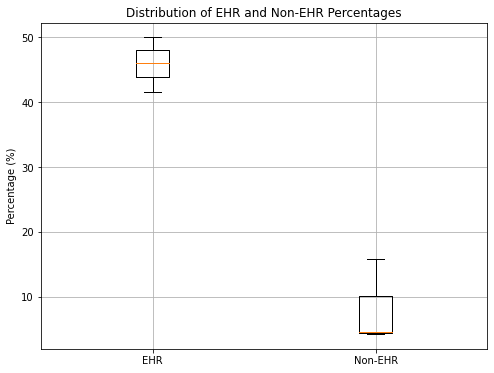

headings: ['Patient', 'Information:', 'Medical', 'History:', 'Current', 'Visit:', 'Diagnosis:', 'Medications', 'Prescribed:', 'Treatment', 'Plan:']
bold: ['Name', 'Date', 'of', 'Birth', 'Gender', 'Address', 'Allergies', 'Date', 'Reason', 'for', 'Visit', 'Albuterol', 'inhaler', '(Proventil)', 'Fluticasone', 'nasal', 'spray', '(Flonase)']
italic: []
italian: []
normal: ['-', ':', 'Jane', 'Smith', '-', ':', '1985-07-20', '-', ':', 'Female', '-', ':', '456', 'Oak', 'St,', 'Anytown,', 'CA,', 'USA', '-', 'Asthma', 'diagnosed', 'on', '2000-05-10', '-', ':', 'Dust', 'mites,', 'Penicillin', '-', ':', '2024-06-15', '-', ':', 'Follow-up', 'for', 'asthma', 'management', 'and', 'annual', 'check-up', '-', 'Asthma', 'exacerbation', '(J45.901)', '-', 'Allergic', 'rhinitis', '(J30.1)', '-', '-', '2', 'puffs', 'as', 'needed', 'for', 'wheezing', '-', '-', '1', 'spray', 'each', 'nostril', 'daily', '-', 'Use', 'Albuterol', 'inhaler', 'as', 'needed', 'for', 'wheezing', 'episodes.', '-', 'Continue', 'Flutica

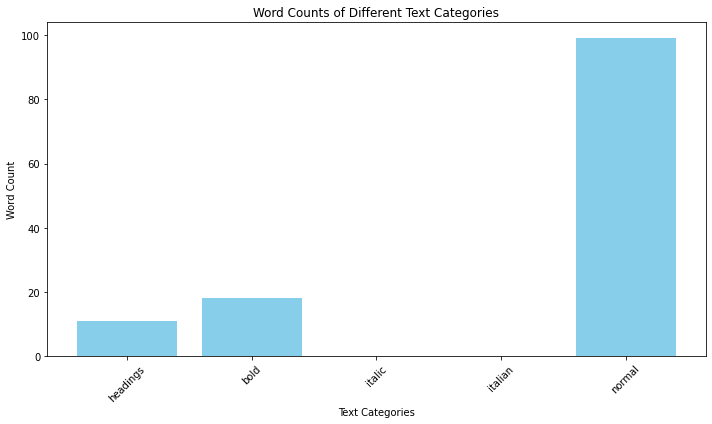

Suggested threshold: 28.69%
Enter the path to the new PDF file: C:/mini project/dataset/ehr2.pdf
The file C:/mini project/dataset/ehr2.pdf is classified as: EHR


In [10]:
import os
import string
import nltk
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import fitz  # PyMuPDF

# Download NLTK resources if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')

def extract_from_pdf(file_path):
    doc = fitz.open(file_path)
    text_dict = {"headings": [], "bold": [], "italic": [], "italian": [], "normal": []}
    
    for page in doc:
        blocks = page.get_text("dict")["blocks"]
        for block in blocks:
            if "lines" in block:
                for line in block["lines"]:
                    for span in line["spans"]:
                        text = span["text"]
                        font_flags = span["flags"]
                        font_size = span["size"]
                        font = span["font"]
                        weight = span.get("weight", 400)
                        
                        # Assuming headings are text spans with a larger font size (e.g., > 14)
                        if font_size > 14:
                            text_dict["headings"].extend(text.split())
                        elif "bold" in font.lower() or font_flags & 2 or weight > 500:  # Check if the font name contains "bold", if bold flag is set, or if weight is high
                            text_dict["bold"].extend(text.split())
                        elif "italic" in font.lower() or font_flags & 1:  # Check if the font name contains "italic" or if italic flag is set
                            text_dict["italic"].extend(text.split())
                        elif "italian" in font.lower() or "italico" in font.lower():  # Check if the font name contains "italian" or "italico"
                            text_dict["italian"].extend(text.split())
                        else:
                            text_dict["normal"].extend(text.split())
                    
    return text_dict

def extract_text(file_path):
    _, file_extension = os.path.splitext(file_path)
    file_extension = file_extension.lower()
    
    if file_extension == ".pdf":
        return extract_from_pdf(file_path)
    else:
        raise ValueError("Unsupported file type. Please use a file with extension 'pdf'.")

def clean_and_lemmatize(text_dict):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    punctuations = string.punctuation + ""  # Add any other specific symbols to remove
    
    cleaned_dict = {}
    for key, values in text_dict.items():
        cleaned_values = []
        for value in values:
            value = value.lower().strip(punctuations)
            if value and value not in stop_words:
                lemmatized_value = lemmatizer.lemmatize(value)
                cleaned_values.append(lemmatized_value)
        cleaned_dict[key] = cleaned_values
    
    return cleaned_dict

def print_text_dict(text_dict):
    for key, values in text_dict.items():
        print(f"{key}:", values)

def count_words(text_dict):
    word_counts = {key: len(values) for key, values in text_dict.items()}
    return word_counts

def total_counts(word_counts):
    total_count = sum(word_counts.values())
    return total_count

def filter_medical_terms(text_dict, medical_terms):
    filtered_dict = {}
    medical_terms_set = set(medical_terms)  # Convert to set for faster lookup
    
    for key, values in text_dict.items():
        filtered_values = [value for value in values if value in medical_terms_set]
        filtered_dict[key] = filtered_values
    
    return filtered_dict

def calculate_percentage(cleaned_dict, filtered_dict, weights):
    # Calculate the total number of words from the cleaned dictionary
    total_words = sum(len(values) for values in cleaned_dict.values())
    
    # Calculate the weighted count from the filtered dictionary
    weighted_count = sum(len(filtered_dict[key]) * weights[key] for key in filtered_dict.keys())
    
    # Calculate the percentage
    percentage = (weighted_count / total_words) * 100
    return percentage

# Define a function to calculate the percentage for a given PDF
def calculate_ehr_percentage(file_path, medical_terms, weights):
    text_dict = extract_text(file_path)
    cleaned_dict = clean_and_lemmatize(text_dict)
    filtered_dict = filter_medical_terms(cleaned_dict, medical_terms)
    percentage = calculate_percentage(cleaned_dict, filtered_dict, weights)
    return percentage

# Sample paths (you should replace these with actual file paths)
ehr_files = ["C:/mini project/dataset/ehr4.pdf", "C:/mini project/dataset/ehr5.pdf", "C:/mini project/dataset/ehr3.pdf"]
non_ehr_files = ["C:/mini project/dataset/non_ehr1.pdf", "C:/mini project/dataset/non_ehr2.pdf", "C:/mini project/dataset/non_ehr3.pdf"]

# Calculate percentages
ehr_percentages = [calculate_ehr_percentage(file, medical_terms, weights) for file in ehr_files]
non_ehr_percentages = [calculate_ehr_percentage(file, medical_terms, weights) for file in non_ehr_files]

# Box plot for distribution of percentages
plt.figure(figsize=(8, 6))
plt.boxplot([ehr_percentages, non_ehr_percentages], labels=['EHR', 'Non-EHR'])
plt.title('Distribution of EHR and Non-EHR Percentages')
plt.ylabel('Percentage (%)')
plt.grid(True)
plt.show()

# Plot word counts
def plot_word_counts(text_dict):
    categories = list(text_dict.keys())
    counts = [len(text_dict[category]) for category in categories]
    
    plt.figure(figsize=(10, 6))
    plt.bar(categories, counts, color='skyblue')
    plt.xlabel('Text Categories')
    plt.ylabel('Word Count')
    plt.title('Word Counts of Different Text Categories')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example of plotting word counts
file_path = ehr_files[0]
text_dict = extract_text(file_path)
print_text_dict(text_dict)
plot_word_counts(text_dict)

# Analyze the distributions and decide on a threshold
# For example, if there's a clear gap between EHR and non-EHR percentages
threshold = (min(ehr_percentages) + max(non_ehr_percentages)) / 2
print(f"Suggested threshold: {threshold:.2f}%")

# Classify new PDFs based on the threshold
def classify_pdf(file_path, threshold, medical_terms, weights):
    percentage = calculate_ehr_percentage(file_path, medical_terms, weights)
    return "EHR" if percentage >= threshold else "Non-EHR"

# Example classification
new_file_path = input("Enter the path to the new PDF file: ")
classification = classify_pdf(new_file_path, threshold, medical_terms, weights)
print(f"The file {new_file_path} is classified as: {classification}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\himav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


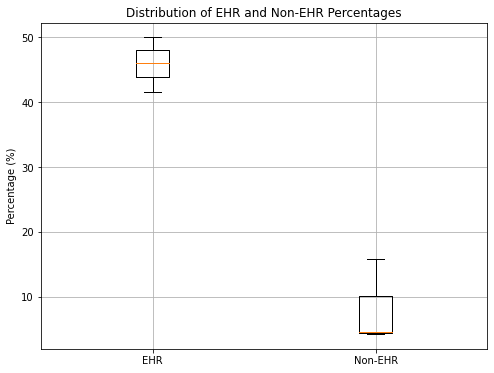

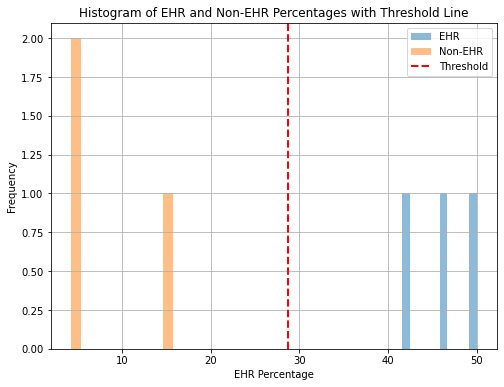

Enter the path to the new PDF file: C:/mini project/dataset/ehr4.pdf
The percentage of EHR content in 'C:/mini project/dataset/ehr4.pdf' is: 46.07%
The file 'C:/mini project/dataset/ehr4.pdf' is classified as: EHR


In [11]:
import os
import string
import nltk
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import fitz  # PyMuPDF

# Download NLTK resources if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')

def extract_from_pdf(file_path):
    doc = fitz.open(file_path)
    text_dict = {"headings": [], "bold": [], "italic": [], "italian": [], "normal": []}
    
    for page in doc:
        blocks = page.get_text("dict")["blocks"]
        for block in blocks:
            if "lines" in block:
                for line in block["lines"]:
                    for span in line["spans"]:
                        text = span["text"]
                        font_flags = span["flags"]
                        font_size = span["size"]
                        font = span["font"]
                        weight = span.get("weight", 400)
                        
                        # Assuming headings are text spans with a larger font size (e.g., > 14)
                        if font_size > 14:
                            text_dict["headings"].extend(text.split())
                        elif "bold" in font.lower() or font_flags & 2 or weight > 500:  # Check if the font name contains "bold", if bold flag is set, or if weight is high
                            text_dict["bold"].extend(text.split())
                        elif "italic" in font.lower() or font_flags & 1:  # Check if the font name contains "italic" or if italic flag is set
                            text_dict["italic"].extend(text.split())
                        elif "italian" in font.lower() or "italico" in font.lower():  # Check if the font name contains "italian" or "italico"
                            text_dict["italian"].extend(text.split())
                        else:
                            text_dict["normal"].extend(text.split())
                    
    return text_dict

def extract_text(file_path):
    _, file_extension = os.path.splitext(file_path)
    file_extension = file_extension.lower()
    
    if file_extension == ".pdf":
        return extract_from_pdf(file_path)
    else:
        raise ValueError("Unsupported file type. Please use a file with extension 'pdf'.")

def clean_and_lemmatize(text_dict):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    punctuations = string.punctuation + ""  # Add any other specific symbols to remove
    
    cleaned_dict = {}
    for key, values in text_dict.items():
        cleaned_values = []
        for value in values:
            value = value.lower().strip(punctuations)
            if value and value not in stop_words:
                lemmatized_value = lemmatizer.lemmatize(value)
                cleaned_values.append(lemmatized_value)
        cleaned_dict[key] = cleaned_values
    
    return cleaned_dict

def print_text_dict(text_dict):
    for key, values in text_dict.items():
        print(f"{key}:", values)

def count_words(text_dict):
    word_counts = {key: len(values) for key, values in text_dict.items()}
    return word_counts

def total_counts(word_counts):
    total_count = sum(word_counts.values())
    return total_count

def filter_medical_terms(text_dict, medical_terms):
    filtered_dict = {}
    medical_terms_set = set(medical_terms)  # Convert to set for faster lookup
    
    for key, values in text_dict.items():
        filtered_values = [value for value in values if value in medical_terms_set]
        filtered_dict[key] = filtered_values
    
    return filtered_dict

def calculate_percentage(cleaned_dict, filtered_dict, weights):
    # Calculate the total number of words from the cleaned dictionary
    total_words = sum(len(values) for values in cleaned_dict.values())
    
    # Calculate the weighted count from the filtered dictionary
    weighted_count = sum(len(filtered_dict[key]) * weights[key] for key in filtered_dict.keys())
    
    # Calculate the percentage
    percentage = (weighted_count / total_words) * 100
    return percentage

# Define a function to calculate the percentage for a given PDF
def calculate_ehr_percentage(file_path, medical_terms, weights):
    text_dict = extract_text(file_path)
    cleaned_dict = clean_and_lemmatize(text_dict)
    filtered_dict = filter_medical_terms(cleaned_dict, medical_terms)
    percentage = calculate_percentage(cleaned_dict, filtered_dict, weights)
    return percentage

# Sample paths (you should replace these with actual file paths)
ehr_files = ["C:/mini project/dataset/ehr4.pdf", "C:/mini project/dataset/ehr5.pdf", "C:/mini project/dataset/ehr3.pdf"]
non_ehr_files = ["C:/mini project/dataset/non_ehr1.pdf", "C:/mini project/dataset/non_ehr2.pdf", "C:/mini project/dataset/non_ehr3.pdf"]

# Calculate percentages
ehr_percentages = [calculate_ehr_percentage(file, medical_terms, weights) for file in ehr_files]
non_ehr_percentages = [calculate_ehr_percentage(file, medical_terms, weights) for file in non_ehr_files]

# Box plot for distribution of percentages
plt.figure(figsize=(8, 6))
plt.boxplot([ehr_percentages, non_ehr_percentages], labels=['EHR', 'Non-EHR'])
plt.title('Distribution of EHR and Non-EHR Percentages')
plt.ylabel('Percentage (%)')
plt.grid(True)
plt.show()

# Histogram for distribution of percentages with threshold line
plt.figure(figsize=(8, 6))
plt.hist(ehr_percentages, bins=10, alpha=0.5, label='EHR')
plt.hist(non_ehr_percentages, bins=10, alpha=0.5, label='Non-EHR')
plt.axvline(x=threshold, color='red', linestyle='--', linewidth=2, label='Threshold')
plt.xlabel('EHR Percentage')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Histogram of EHR and Non-EHR Percentages with Threshold Line')
plt.grid(True)
plt.show()

# Print percentage of EHR for the new PDF
new_file_path = input("Enter the path to the new PDF file: ")
percentage_ehr = calculate_ehr_percentage(new_file_path, medical_terms, weights)
print(f"The percentage of EHR content in '{new_file_path}' is: {percentage_ehr:.2f}%")

# Classify new PDFs based on the threshold
def classify_pdf(file_path, threshold, medical_terms, weights):
    percentage = calculate_ehr_percentage(file_path, medical_terms, weights)
    return "EHR" if percentage >= threshold else "Non-EHR"

# Example classification
classification = classify_pdf(new_file_path, threshold, medical_terms, weights)
print(f"The file '{new_file_path}' is classified as: {classification}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\himav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


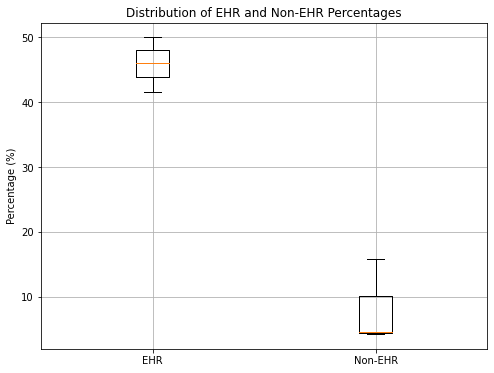

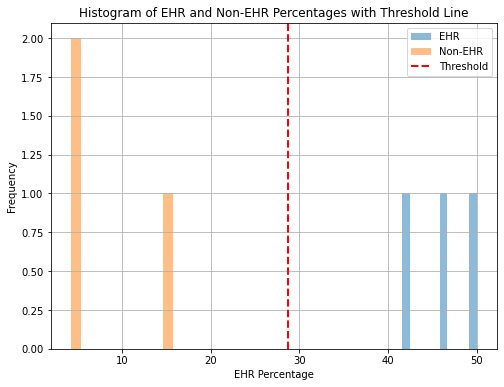


Enter the path to the new PDF file: C:/mini project/dataset/ehr4.pdf

The percentage of EHR content in 'C:/mini project/dataset/ehr4.pdf' is: 46.07%

The file 'C:/mini project/dataset/ehr4.pdf' is classified as: EHR



headings: ['patient', 'medication', 'immunization', 'laboratory', 'radiology', 'medication', 'treatment', 'plan', 'specialist']

bold: ['address', 'phone', 'email', 'phone', 'allergy', 'surgery', 'blood', 'temperature', 'blood', 'glucose', 'cholesterol', 'provider', 'diagnosis', 'nephrology', 'orthopedics']

italic: []

italian: []

normal: ['aspirin', 'diagnosed', 'diagnosed', 'chronic', 'diagnosed', 'stroke', 'inhaler', 'pain', 'patient', 'pain', 'therapy', 'x-ray', 'ultrasound', 'chronic', 'pain', 'chronic', 'hypertension', 'inhaler', 'pain', 'medication', 'blood', 'appointment', 'diet', 'therapy', 'pain', 'blood', 'chronic', 'cardiovascular', 'abdomen']

{'headings': 9, 'bold': 15, 'italic': 0, 'italian': 0, 'normal': 29}


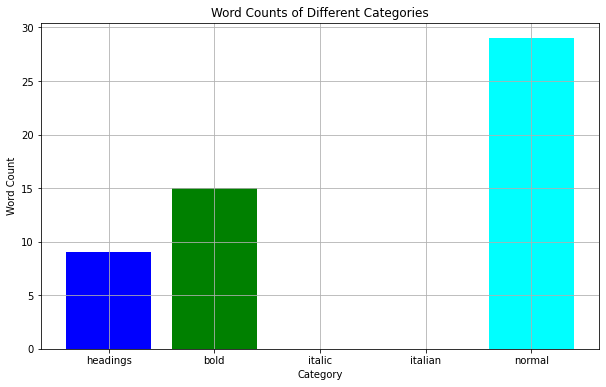

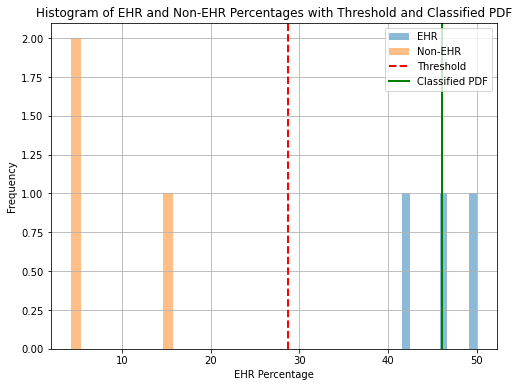

In [12]:
import os
import string
import nltk
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import fitz  # PyMuPDF

# Download NLTK resources if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')

def extract_from_pdf(file_path):##
    doc = fitz.open(file_path)
    text_dict = {"headings": [], "bold": [], "italic": [], "italian": [], "normal": []}
    
    for page in doc:
        blocks = page.get_text("dict")["blocks"]
        for block in blocks:
            if "lines" in block:
                for line in block["lines"]:
                    for span in line["spans"]:
                        text = span["text"]
                        font_flags = span["flags"]
                        font_size = span["size"]
                        font = span["font"]
                        weight = span.get("weight", 400)
                        
                        # Assuming headings are text spans with a larger font size (e.g., > 14)
                        if font_size > 14:
                            text_dict["headings"].extend(text.split())
                        elif "bold" in font.lower() or font_flags & 2 or weight > 500:  # Check if the font name contains "bold", if bold flag is set, or if weight is high
                            text_dict["bold"].extend(text.split())
                        elif "italic" in font.lower() or font_flags & 1:  # Check if the font name contains "italic" or if italic flag is set
                            text_dict["italic"].extend(text.split())
                        elif "italian" in font.lower() or "italico" in font.lower():  # Check if the font name contains "italian" or "italico"
                            text_dict["italian"].extend(text.split())
                        else:
                            text_dict["normal"].extend(text.split())
                    
    return text_dict

def extract_text(file_path):##
    _, file_extension = os.path.splitext(file_path)
    file_extension = file_extension.lower()
    
    if file_extension == ".pdf":
        return extract_from_pdf(file_path)
    else:
        raise ValueError("Unsupported file type. Please use a file with extension 'pdf'.")

def clean_and_lemmatize(text_dict):##
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    punctuations = string.punctuation + ""  # Add any other specific symbols to remove
    
    cleaned_dict = {}
    for key, values in text_dict.items():
        cleaned_values = []
        for value in values:
            value = value.lower().strip(punctuations)
            if value and value not in stop_words:
                lemmatized_value = lemmatizer.lemmatize(value)
                cleaned_values.append(lemmatized_value)
        cleaned_dict[key] = cleaned_values
    
    return cleaned_dict

def print_text_dict(text_dict):
    for key, values in text_dict.items():
        print(f"\n{key}:", values)

def count_words(text_dict):
    word_counts = {key: len(values) for key, values in text_dict.items()}
    return word_counts

def total_counts(word_counts):
    total_count = sum(word_counts.values())
    return total_count

def filter_medical_terms(text_dict, medical_terms):##
    filtered_dict = {}
    medical_terms_set = set(medical_terms)  # Convert to set for faster lookup
    
    for key, values in text_dict.items():
        filtered_values = [value for value in values if value in medical_terms_set]
        filtered_dict[key] = filtered_values
    
    return filtered_dict

def calculate_percentage(cleaned_dict, filtered_dict, weights):
    # Calculate the total number of words from the cleaned dictionary
    total_words = sum(len(values) for values in cleaned_dict.values())
    
    # Calculate the weighted count from the filtered dictionary
    weighted_count = sum(len(filtered_dict[key]) * weights[key] for key in filtered_dict.keys())
    
    # Calculate the percentage
    percentage = (weighted_count / total_words) * 100
    return percentage

# Define a function to calculate the percentage for a given PDF
def calculate_ehr_percentage(file_path, medical_terms, weights):
    text_dict = extract_text(file_path)#
    cleaned_dict = clean_and_lemmatize(text_dict)#
    filtered_dict = filter_medical_terms(cleaned_dict, medical_terms)#
    percentage = calculate_percentage(cleaned_dict, filtered_dict, weights)
    return percentage

# Sample paths (you should replace these with actual file paths)
ehr_files = ["C:/mini project/dataset/ehr4.pdf", "C:/mini project/dataset/ehr5.pdf", "C:/mini project/dataset/ehr3.pdf"]
non_ehr_files = ["C:/mini project/dataset/non_ehr1.pdf", "C:/mini project/dataset/non_ehr2.pdf", "C:/mini project/dataset/non_ehr3.pdf"]

# Calculate percentages
ehr_percentages = [calculate_ehr_percentage(file, medical_terms, weights) for file in ehr_files]
non_ehr_percentages = [calculate_ehr_percentage(file, medical_terms, weights) for file in non_ehr_files]

# Box plot for distribution of percentages
plt.figure(figsize=(8, 6))
plt.boxplot([ehr_percentages, non_ehr_percentages], labels=['EHR', 'Non-EHR'])
plt.title('Distribution of EHR and Non-EHR Percentages')
plt.ylabel('Percentage (%)')
plt.grid(True)
plt.show()

# Histogram for distribution of percentages with threshold line
plt.figure(figsize=(8, 6))
plt.hist(ehr_percentages, bins=10, alpha=0.5, label='EHR')
plt.hist(non_ehr_percentages, bins=10, alpha=0.5, label='Non-EHR')
plt.axvline(x=threshold, color='red', linestyle='--', linewidth=2, label='Threshold')
plt.xlabel('EHR Percentage')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Histogram of EHR and Non-EHR Percentages with Threshold Line')
plt.grid(True)
plt.show()

# Print percentage of EHR for the new PDF
new_file_path = input("\nEnter the path to the new PDF file: ")
percentage_ehr = calculate_ehr_percentage(new_file_path, medical_terms, weights)
print(f"\nThe percentage of EHR content in '{new_file_path}' is: {percentage_ehr:.2f}%\n")

# Classify new PDFs based on the threshold
def classify_pdf(file_path, threshold, medical_terms, weights):
    percentage = calculate_ehr_percentage(file_path, medical_terms, weights)
    return "EHR" if percentage >= threshold else "Non-EHR"

# Example classification
classification = classify_pdf(new_file_path, threshold, medical_terms, weights)
print(f"The file '{new_file_path}' is classified as: {classification}\n\n")

# Plot word counts for different categories
def plot_word_counts(text_dict):
    categories = list(text_dict.keys())
    counts = [text_dict[category] for category in categories]

    plt.figure(figsize=(10, 6))
    plt.bar(categories, counts, color=['blue', 'green', 'orange', 'purple', 'cyan'])
    plt.xlabel('Category')
    plt.ylabel('Word Count')
    plt.title('Word Counts of Different Categories')
    plt.grid(True)
    plt.show()

def print_bold(text):
    print(f"\n\033[1m{text}\033[0m")


# Plot word counts
text_dict = filtered_dict
print_text_dict(text_dict)
word_counts = count_words(text_dict)
print_bold(word_counts)
plot_word_counts(word_counts)


# Highlight the classified PDF with green color in the histogram
plt.figure(figsize=(8, 6))
plt.hist(ehr_percentages, bins=10, alpha=0.5, label='EHR')
plt.hist(non_ehr_percentages, bins=10, alpha=0.5, label='Non-EHR')
plt.axvline(x=threshold, color='red', linestyle='--', linewidth=2, label='Threshold')
plt.axvline(x=percentage_ehr, color='green', linestyle='-', linewidth=2, label='Classified PDF')
plt.xlabel('EHR Percentage')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Histogram of EHR and Non-EHR Percentages with Threshold and Classified PDF')
plt.grid(True)
plt.show()


In [13]:
import pandas as pd

# Function to print summary table of EHR and Non-EHR Percentages
def print_summary_table(ehr_files, non_ehr_files, medical_terms, weights, threshold):
    summary_data = []
    
    for file in ehr_files + non_ehr_files:
        percentage = calculate_ehr_percentage(file, medical_terms, weights)
        classification = "EHR" if percentage >= threshold else "Non-EHR"
        summary_data.append([os.path.basename(file), percentage, classification])
    
    summary_df = pd.DataFrame(summary_data, columns=["Document Name", "EHR Percentage (%)", "Classification"])
    print(summary_df)

# Function to print word counts by category
def print_word_counts_table(word_counts):
    word_counts_df = pd.DataFrame(list(word_counts.items()), columns=["Category", "Word Count"])
    print(word_counts_df)

# Function to print filtered medical terms count
def print_filtered_terms_count_table(filtered_dict):
    filtered_terms_count = {key: len(values) for key, values in filtered_dict.items()}
    filtered_terms_count_df = pd.DataFrame(list(filtered_terms_count.items()), columns=["Category", "Medical Terms Count"])
    print(filtered_terms_count_df)

# Example usage
print("Summary of EHR and Non-EHR Percentages:")
print_summary_table(ehr_files, non_ehr_files, medical_terms, weights, threshold)

print("\nWord Counts by Category for the new PDF:")
text_dict = extract_text(new_file_path)
cleaned_dict = clean_and_lemmatize(text_dict)
word_counts = count_words(text_dict)
print_word_counts_table(word_counts)

print("\nFiltered Medical Terms Count for the new PDF:")
filtered_dict = filter_medical_terms(cleaned_dict, medical_terms)
print_filtered_terms_count_table(filtered_dict)


Summary of EHR and Non-EHR Percentages:
  Document Name  EHR Percentage (%) Classification
0      ehr4.pdf           46.067416            EHR
1      ehr5.pdf           41.621622            EHR
2      ehr3.pdf           50.000000            EHR
3  non_ehr1.pdf            4.229607        Non-EHR
4  non_ehr2.pdf            4.513064        Non-EHR
5  non_ehr3.pdf           15.750916        Non-EHR

Word Counts by Category for the new PDF:
   Category  Word Count
0  headings          11
1      bold          18
2    italic           0
3   italian           0
4    normal          99

Filtered Medical Terms Count for the new PDF:
   Category  Medical Terms Count
0  headings                    5
1      bold                    3
2    italic                    0
3   italian                    0
4    normal                    4


In [14]:
import pandas as pd

# Function to save summary table of EHR and Non-EHR Percentages
def save_summary_table(ehr_files, non_ehr_files, medical_terms, weights, threshold, output_path):
    summary_data = []
    
    for file in ehr_files + non_ehr_files:
        percentage = calculate_ehr_percentage(file, medical_terms, weights)
        classification = "EHR" if percentage >= threshold else "Non-EHR"
        summary_data.append([os.path.basename(file), percentage, classification])
    
    summary_df = pd.DataFrame(summary_data, columns=["Document Name", "EHR Percentage (%)", "Classification"])
    summary_df.to_csv(output_path, index=False)
    print(f"Summary table saved to {output_path}")

# Function to save word counts by category
def save_word_counts_table(word_counts, output_path):
    word_counts_df = pd.DataFrame(list(word_counts.items()), columns=["Category", "Word Count"])
    word_counts_df.to_csv(output_path, index=False)
    print(f"Word counts table saved to {output_path}")

# Function to save filtered medical terms count
def save_filtered_terms_count_table(filtered_dict, output_path):
    filtered_terms_count = {key: len(values) for key, values in filtered_dict.items()}
    filtered_terms_count_df = pd.DataFrame(list(filtered_terms_count.items()), columns=["Category", "Medical Terms Count"])
    filtered_terms_count_df.to_csv(output_path, index=False)
    print(f"Filtered medical terms count table saved to {output_path}")

# Example usage
summary_output_path = "summary_table.csv"
word_counts_output_path = "word_counts_table.csv"
filtered_terms_count_output_path = "filtered_terms_count_table.csv"

print("Saving Summary of EHR and Non-EHR Percentages:")
save_summary_table(ehr_files, non_ehr_files, medical_terms, weights, threshold, summary_output_path)

print("\nSaving Word Counts by Category for the new PDF:")
text_dict = extract_text(new_file_path)
cleaned_dict = clean_and_lemmatize(text_dict)
word_counts = count_words(text_dict)
save_word_counts_table(word_counts, word_counts_output_path)

print("\nSaving Filtered Medical Terms Count for the new PDF:")
filtered_dict = filter_medical_terms(cleaned_dict, medical_terms)
save_filtered_terms_count_table(filtered_dict, filtered_terms_count_output_path)


Saving Summary of EHR and Non-EHR Percentages:
Summary table saved to summary_table.csv

Saving Word Counts by Category for the new PDF:
Word counts table saved to word_counts_table.csv

Saving Filtered Medical Terms Count for the new PDF:
Filtered medical terms count table saved to filtered_terms_count_table.csv
